In [2]:
pip install hydra-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 15.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=b8d2c2cbc41e1c7329b47655ca9197ea0226ad7adc4b6e50ffeaadc87bc27a7d
  Stored in directory: /root/.cache/pip/wheels/a7/72/3e/7d4bb4df2f34e8a15d0d764bb98e7ca19a765483710646a8b3
Successfully built antlr4-python3-runtime
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 6.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
cd ..

/notebooks/kaggle-child-mind-institute-detect-sleep-states


In [82]:
valid_series_ids = [
    "03d92c9f6f8a", "0cd1e3d0ed95", "0cfc06c129cc", "12d01911d509", "1319a1935f48",
    "1762ab70ec76", "280e08693c6d", "29c75c018220", "2cd2340ca14d", "2fbbee1a38e3",
    "33ceeba8918a", "35826366dfc7", "3665c86afaf5", "4ac356361be9", "4feda0596965",
    "55b7f5c99930", "599ca4ed791b", "5e816f11f5c3", "5f94bb3e1bed", "601559e1777d",
    "653622ac8363", "6a4cd123bd69", "76237b9406d5", "8898e6db816d", "89bd631d1769",
    "8becc76ea607", "8f6f15b9f598", "8fb18e36697d", "99b829cbad2d", "9b9cd7b7af8c",
    "9ddd40f2cb36", "9fbdeffbe2ba", "a88088855de5", "b1831c4979da", "b7fc34995d0f",
    "bb5612895813", "bccf2f2819f8", "bdfce9ce62b9", "c908a0ad3e31", "ccdee561ee5d",
    "d8de352c2657", "def21f50dd3c", "e2a849d283c0", "e2b60820c325", "ebb6fae8ed43",
    "ee4e0e3afd3d", "eec197a4bdca", "eef041dd50aa", "f0482490923c", "f564985ab692",
    "f56824b503a0", "f7eb179216c2", "fbf33b1a2c10", "fe90110788d2"
]


In [67]:
import pandas as pd
import torch
from pathlib import Path
from hydra import initialize, compose
from hydra.core.global_hydra import GlobalHydra
from src.utils.metrics import event_detection_ap

from src.utils.post_process import post_process_for_seg
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import optuna


plt.style.use("ggplot")

EXP_NAME = "exp7"
RUN_NAME = "single"
RESULT_DIR = Path("data/output/train") / EXP_NAME / RUN_NAME


def load_config(result_dir: Path):
    # clear previous initialization
    GlobalHydra.instance().clear()

    # initialize hydra
    config_path = result_dir / ".hydra"
    initialize(config_path=config_path.as_posix())
    # load the config
    cfg = compose(config_name="config")

    return cfg

In [89]:
#cfg = load_config(RESULT_DIR)
preds = np.load(RESULT_DIR / "preds.npy")
labels = np.load(RESULT_DIR / "labels.npy")
keys = np.load(RESULT_DIR / "keys.npy")


In [90]:

gt_df = pd.read_csv("/notebooks/kaggle-child-mind-institute-detect-sleep-states/data/data/train_events.csv")
gt_df = gt_df[gt_df["series_id"].isin(valid_series_ids)].dropna().reset_index(drop=True)

In [91]:
labels[2,1500:2500,2]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

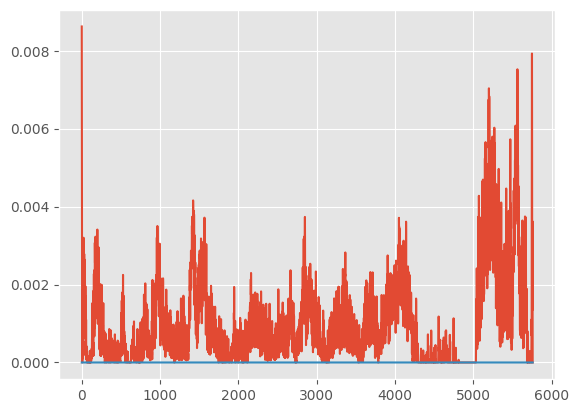

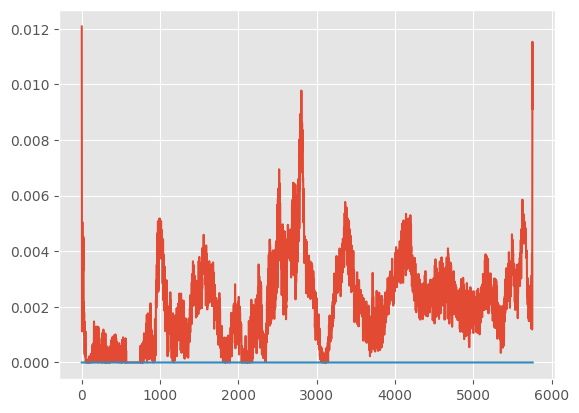

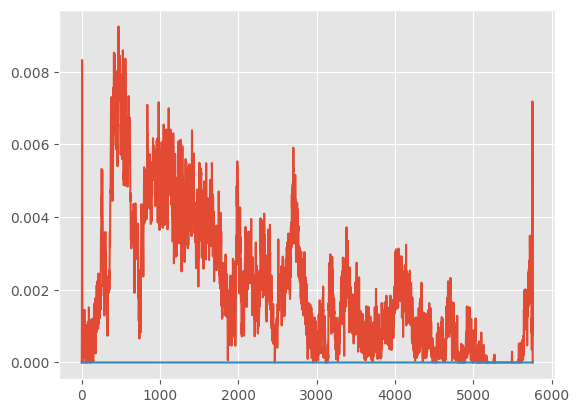

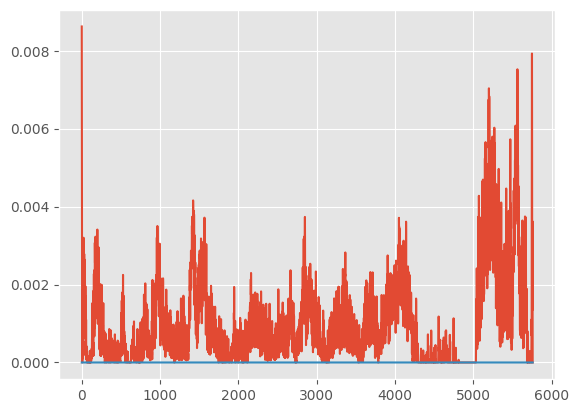

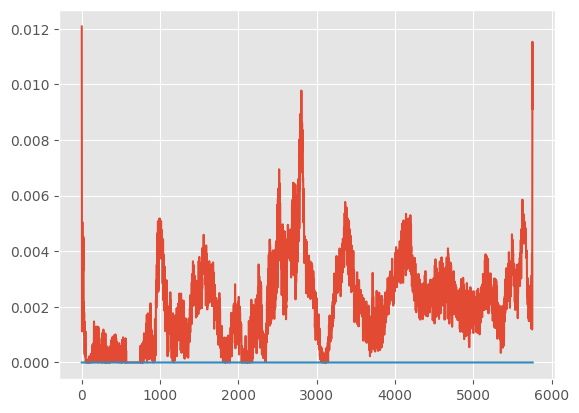

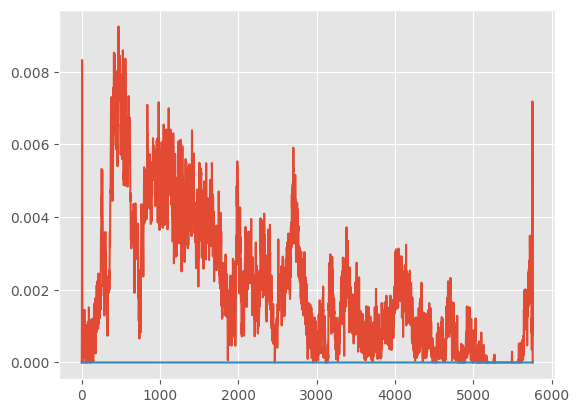

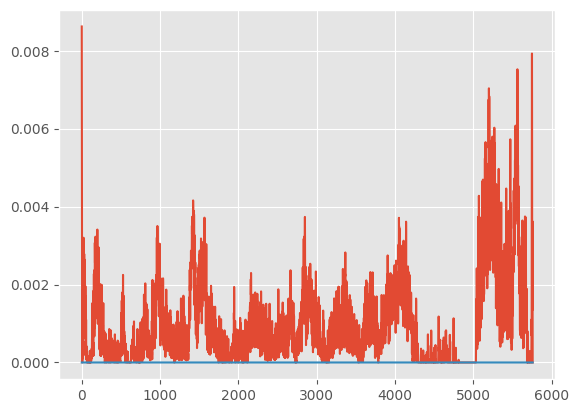

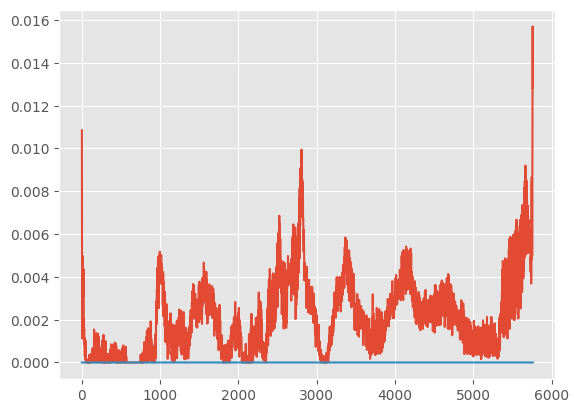

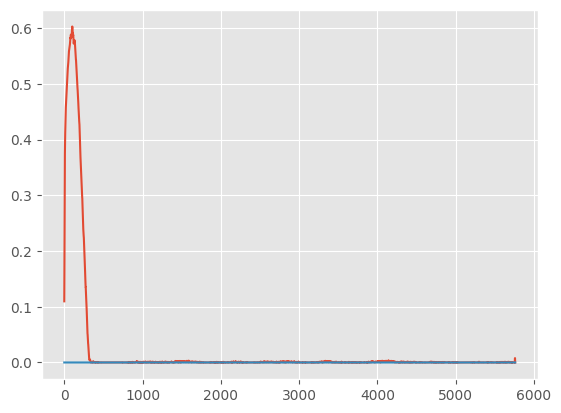

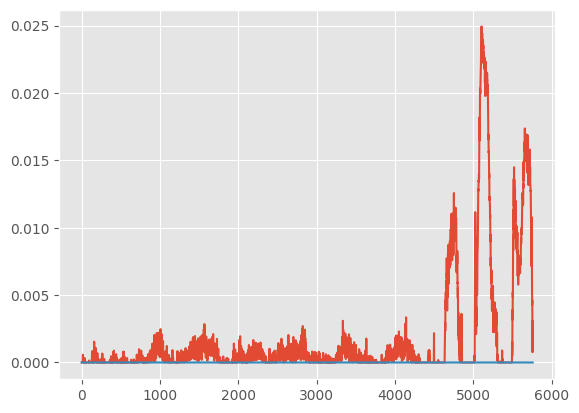

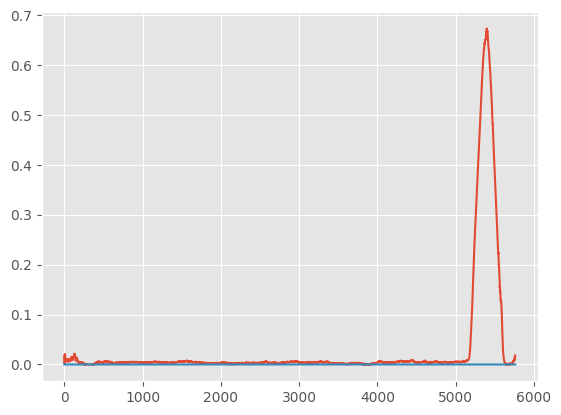

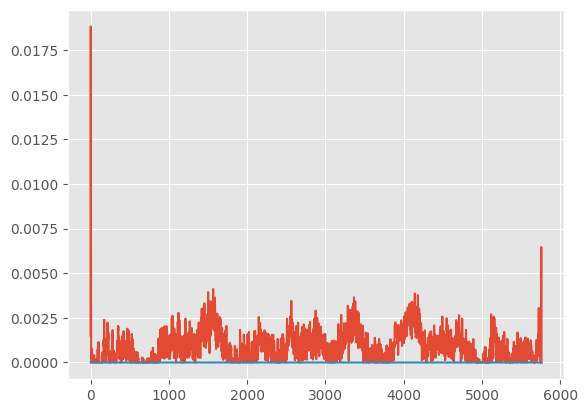

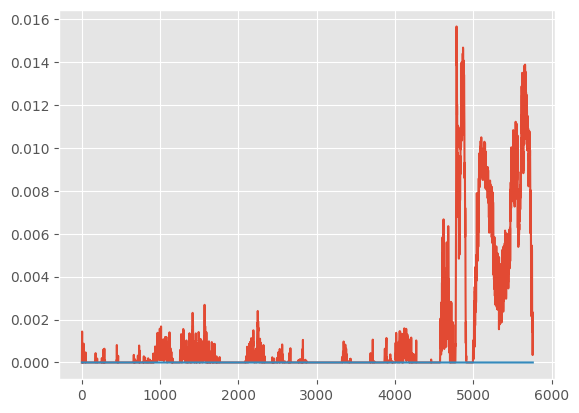

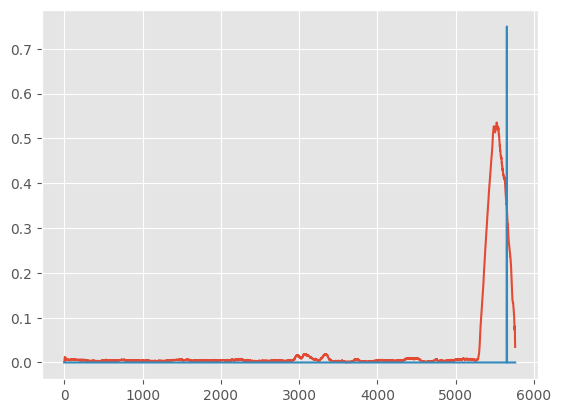

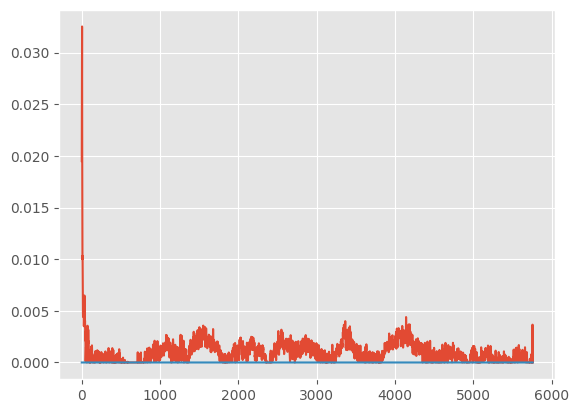

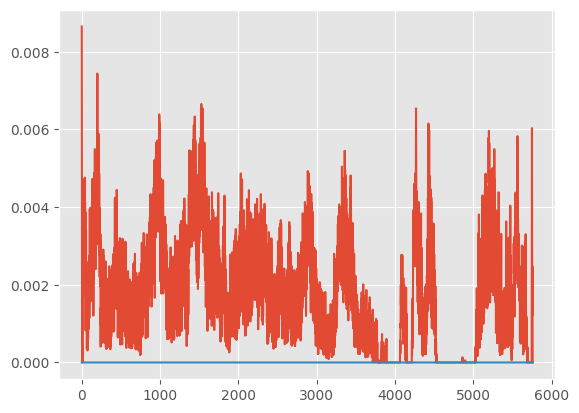

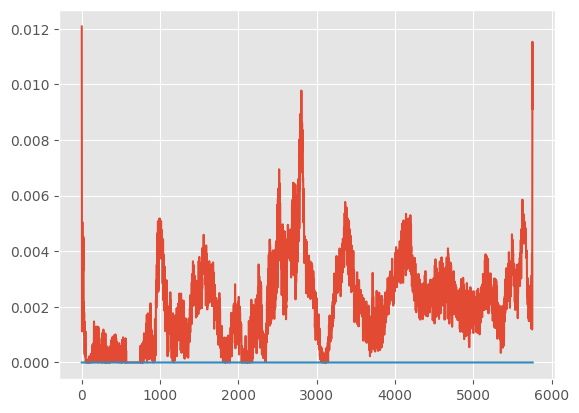

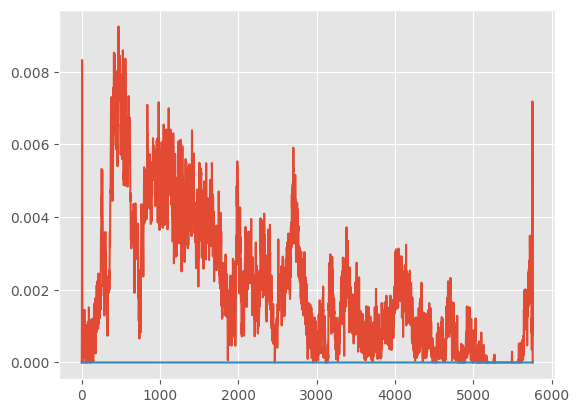

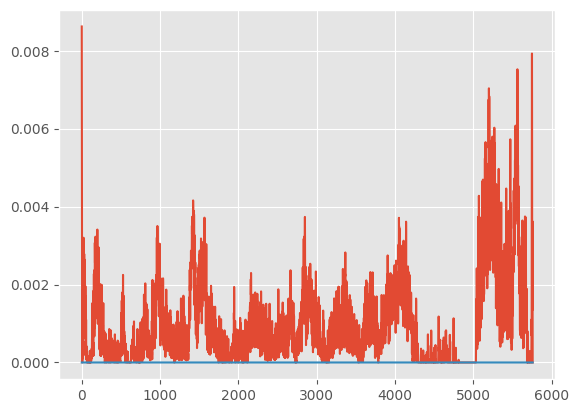

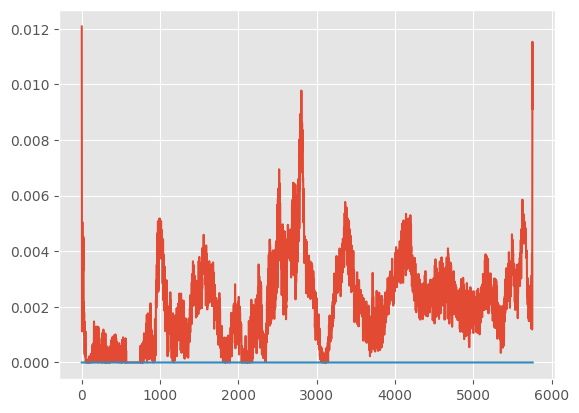

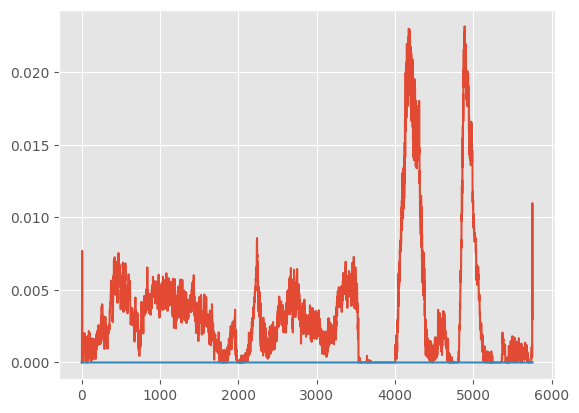

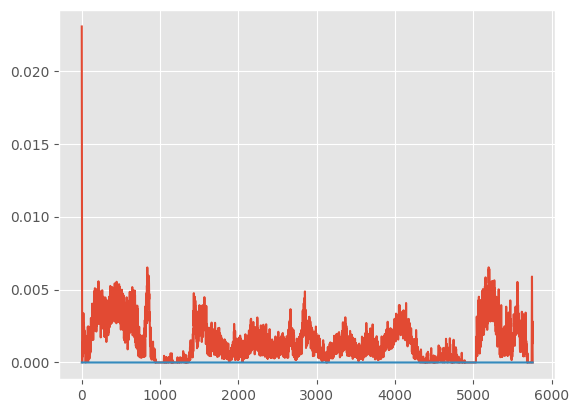

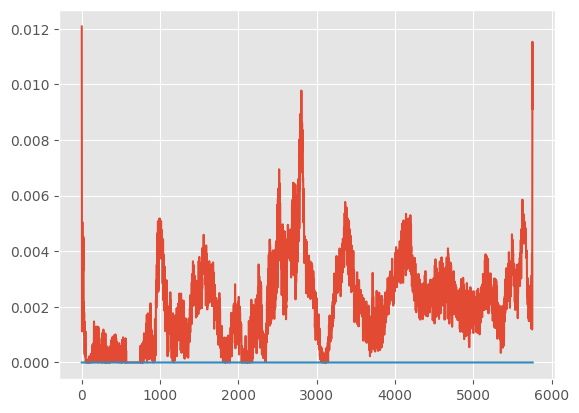

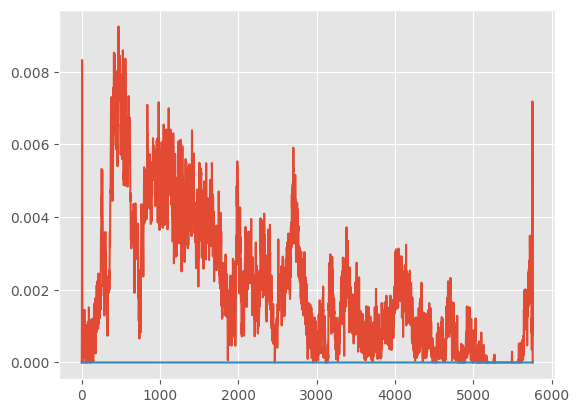

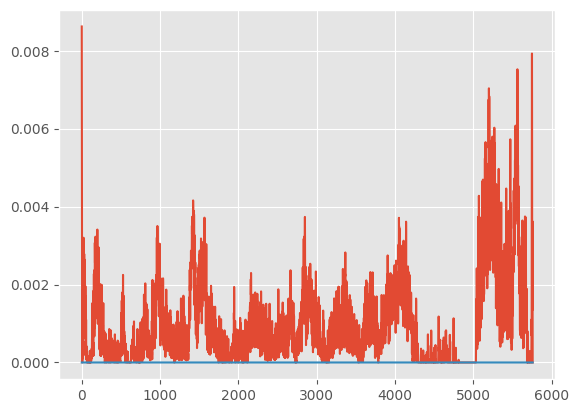

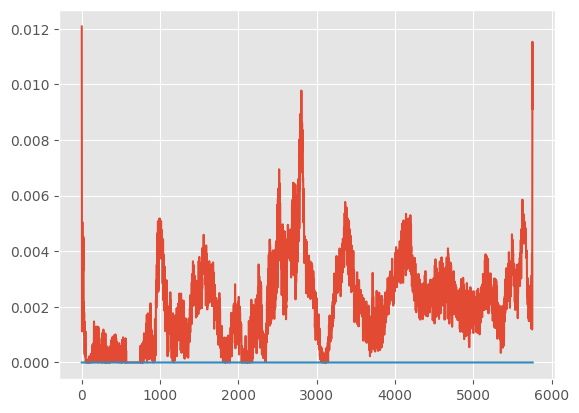

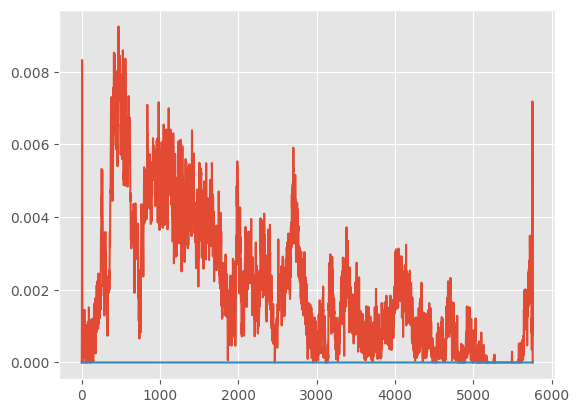

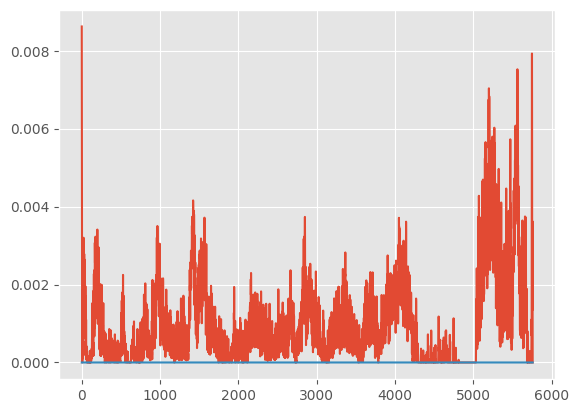

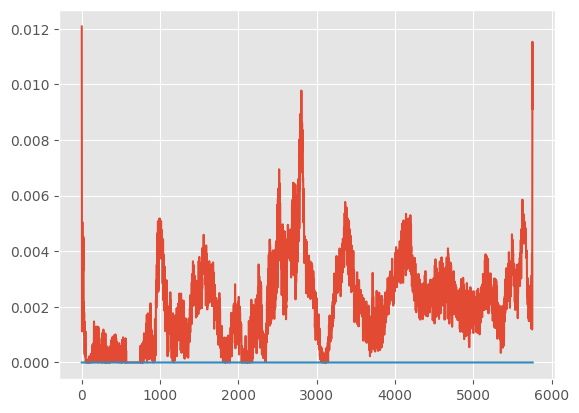

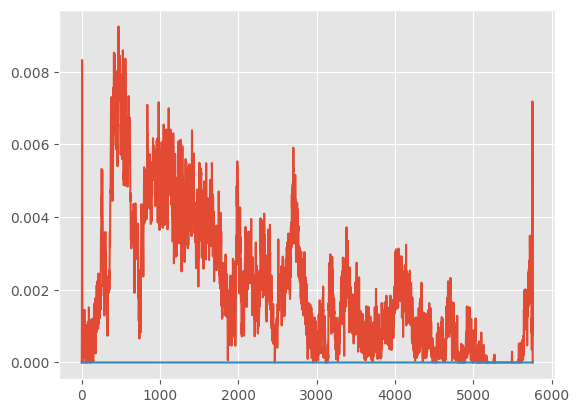

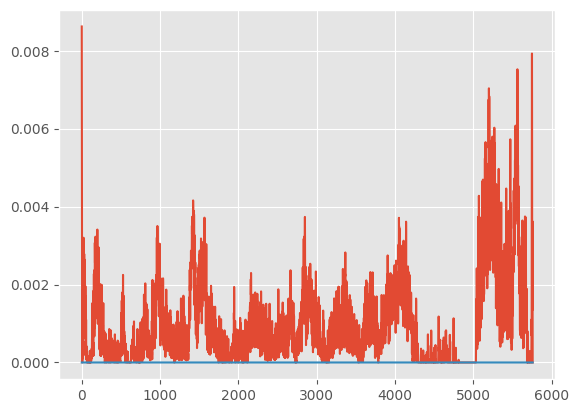

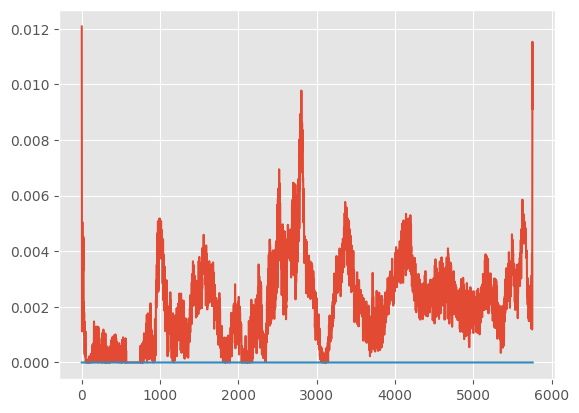

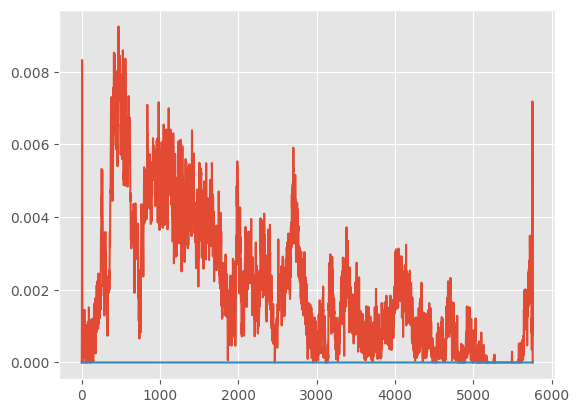

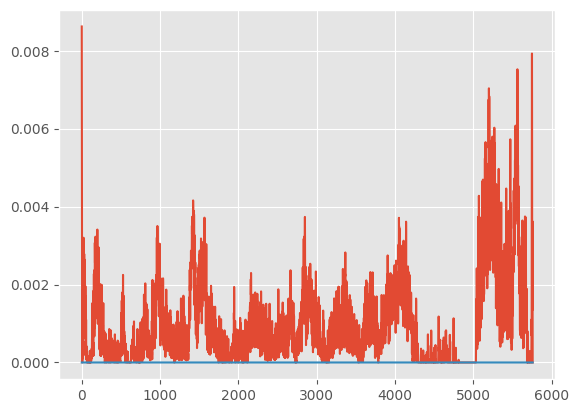

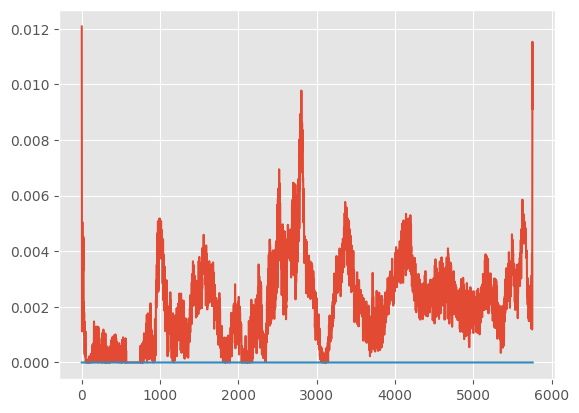

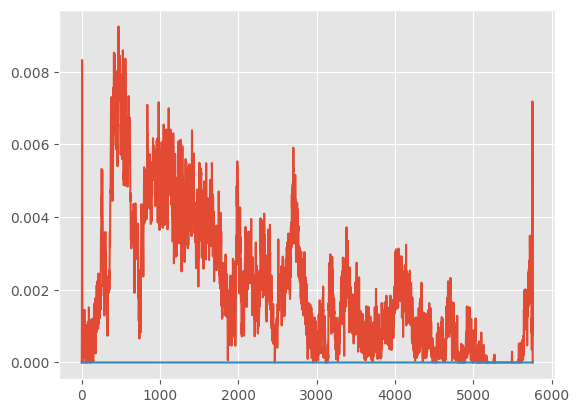

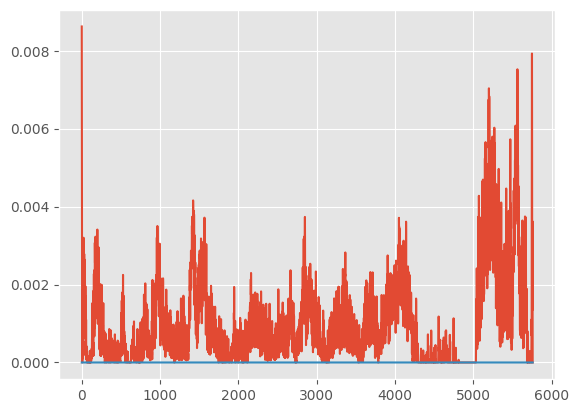

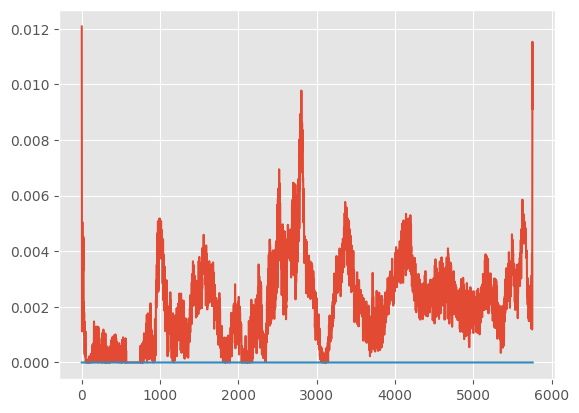

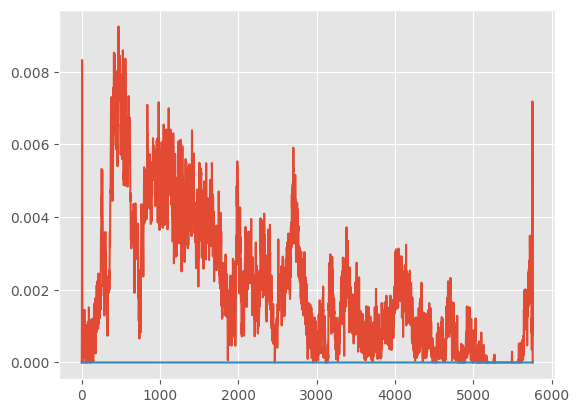

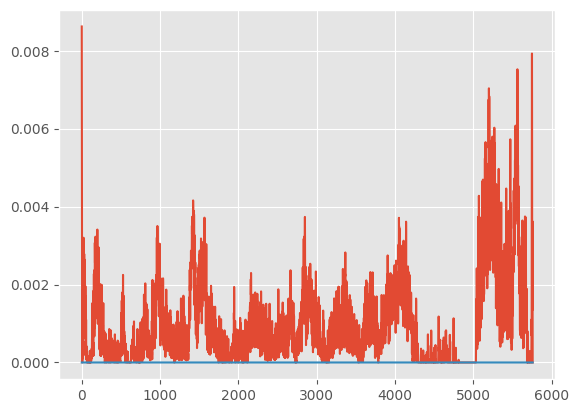

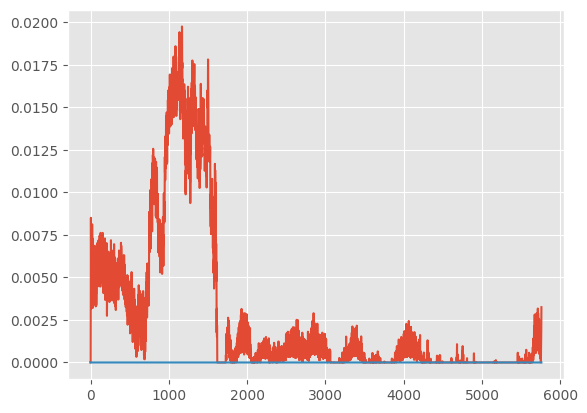

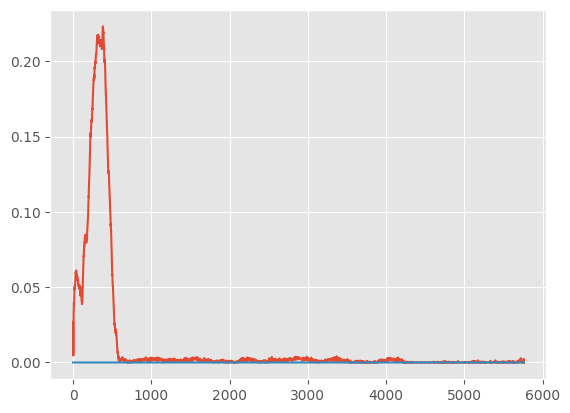

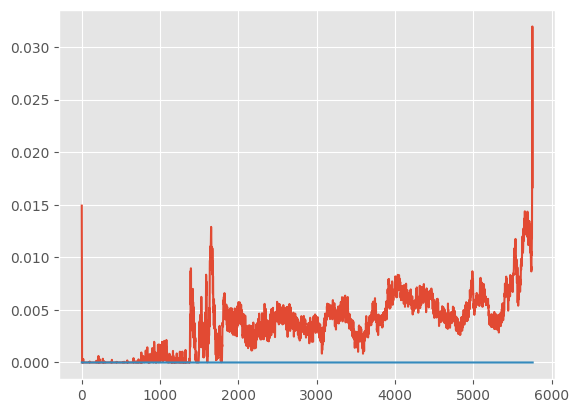

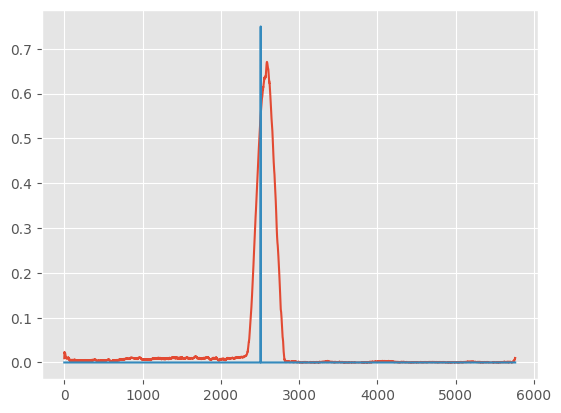

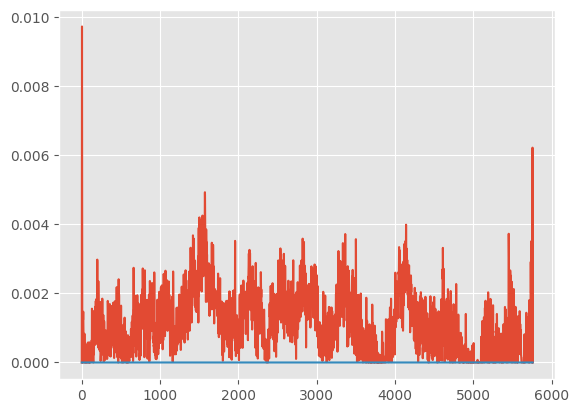

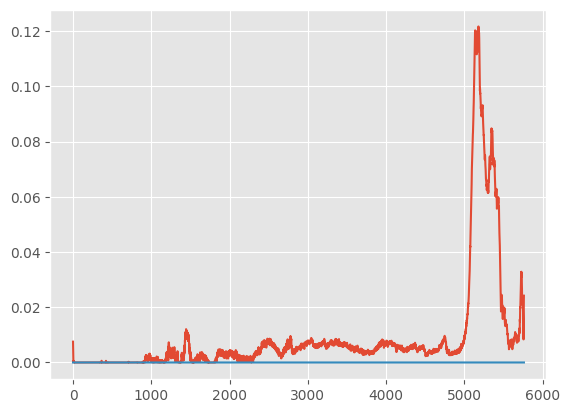

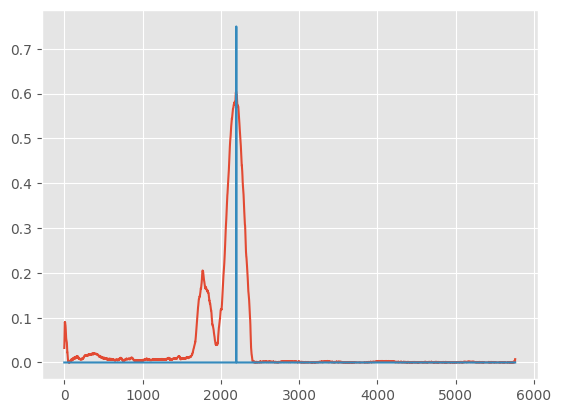

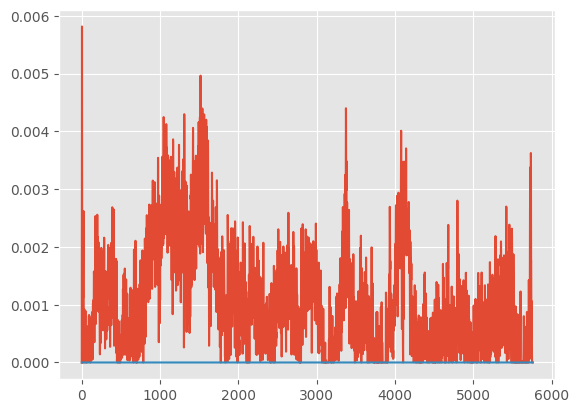

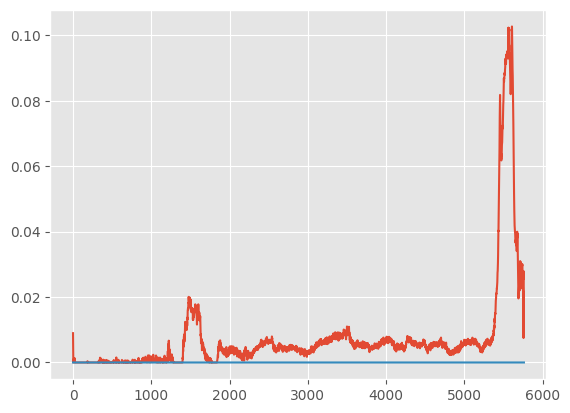

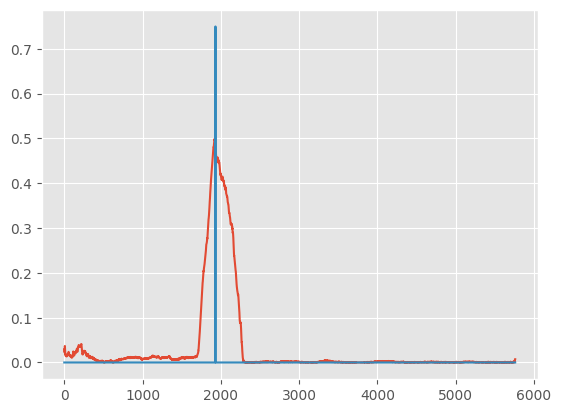

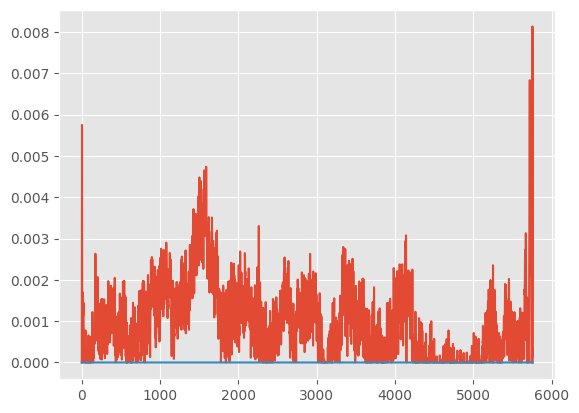

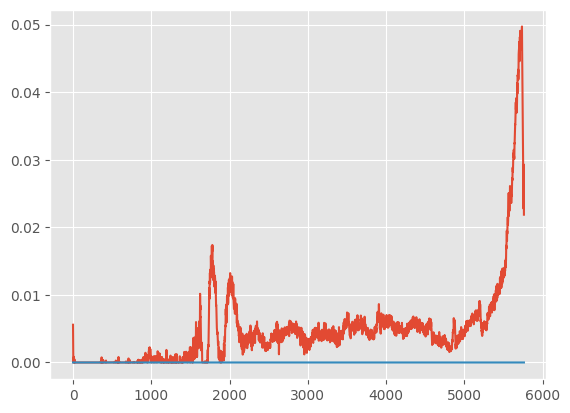

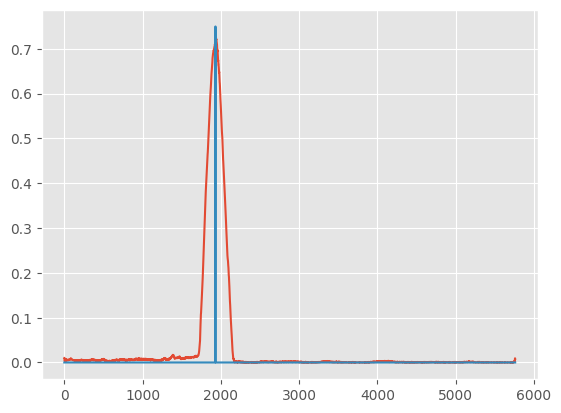

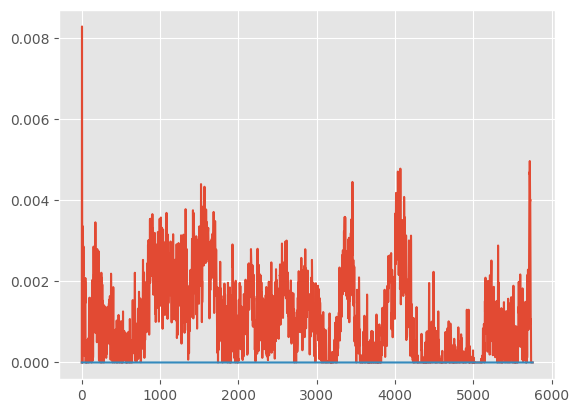

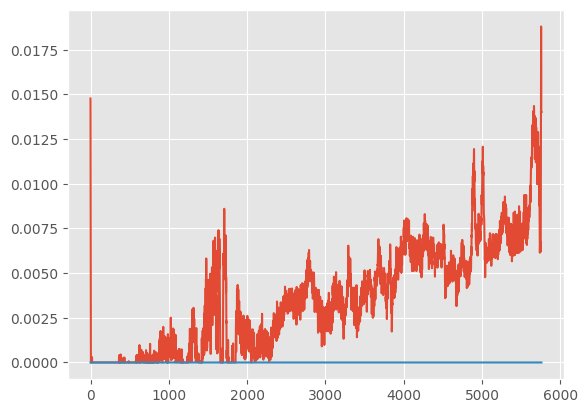

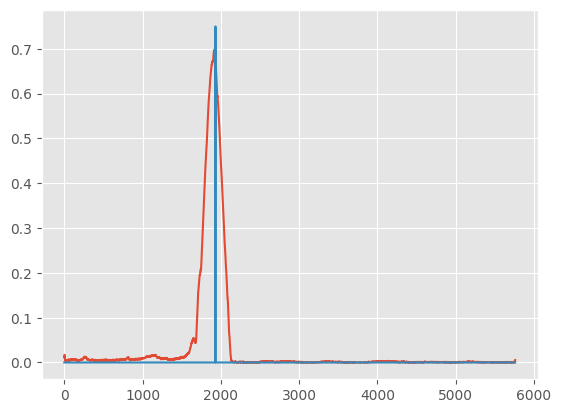

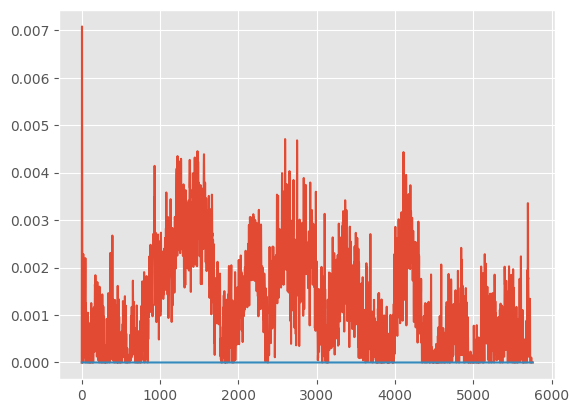

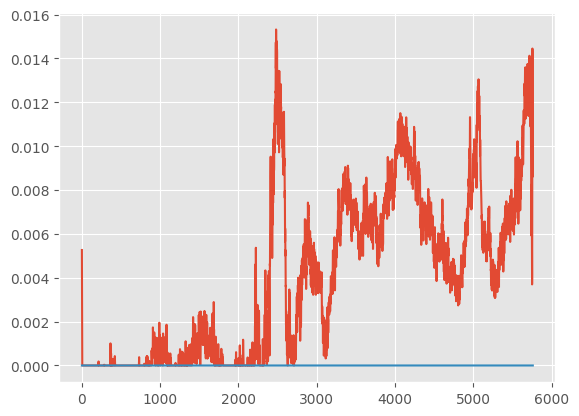

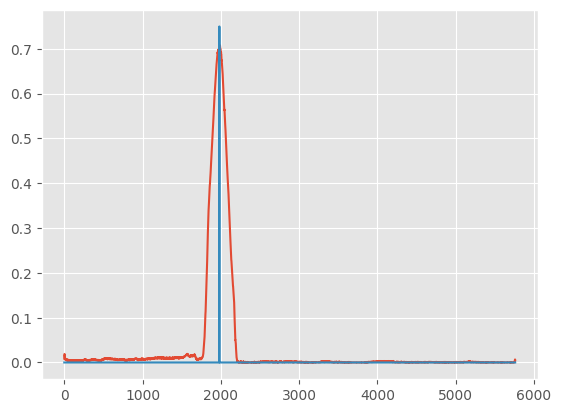

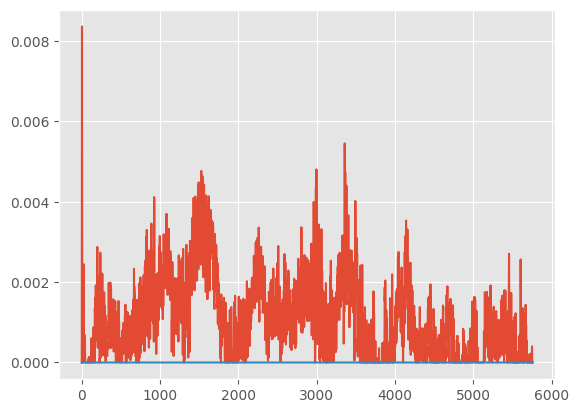

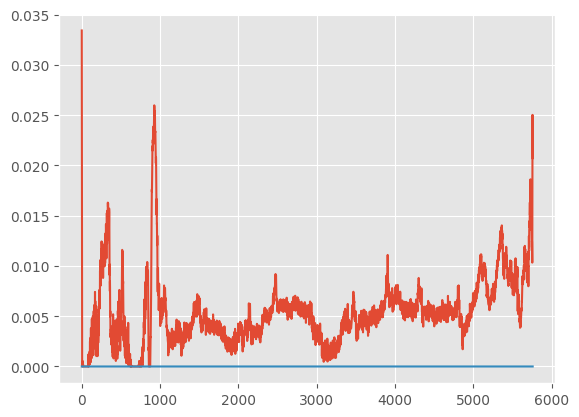

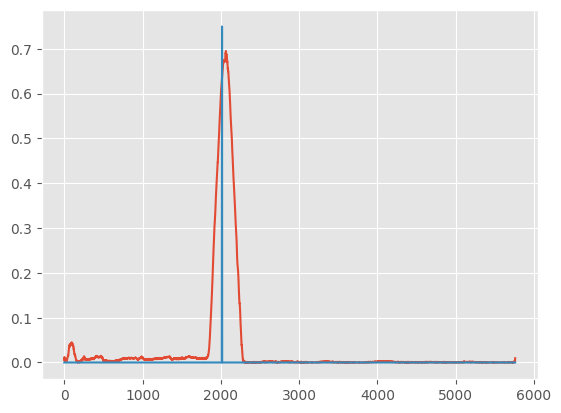

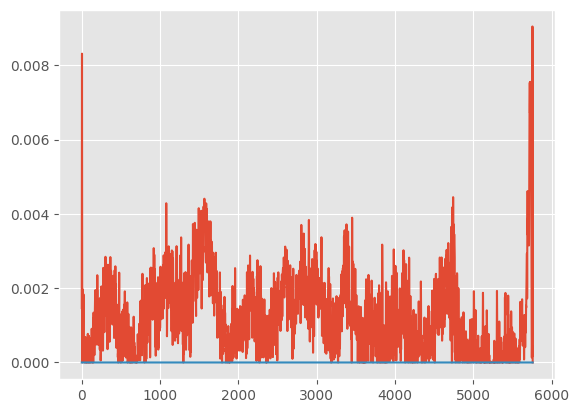

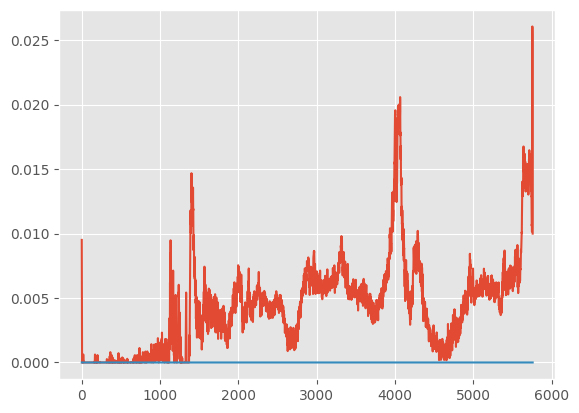

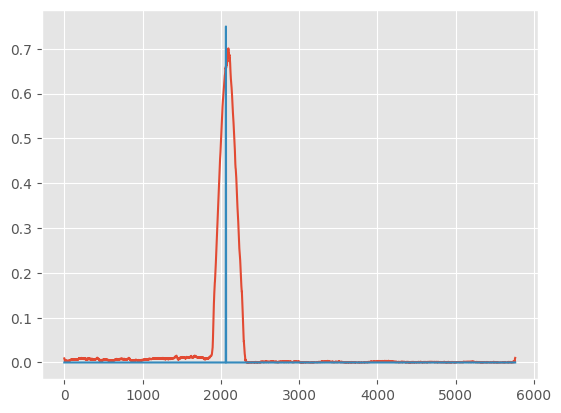

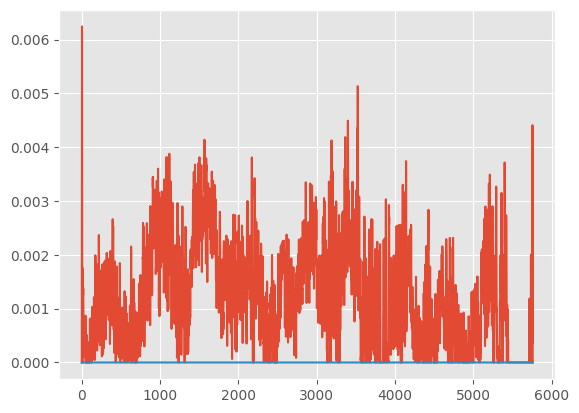

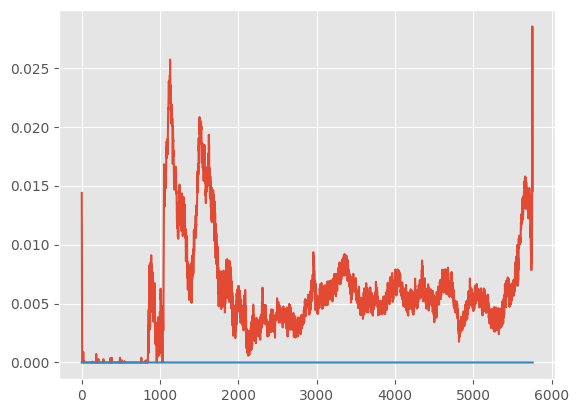

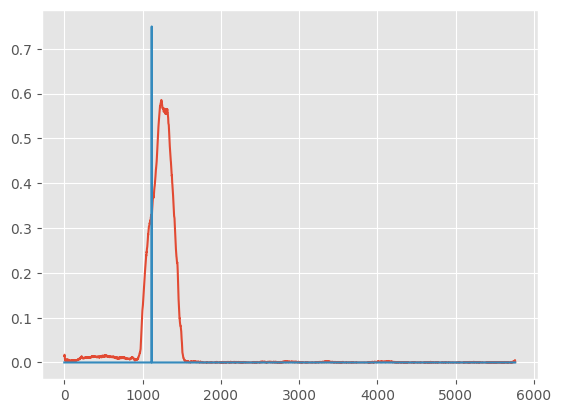

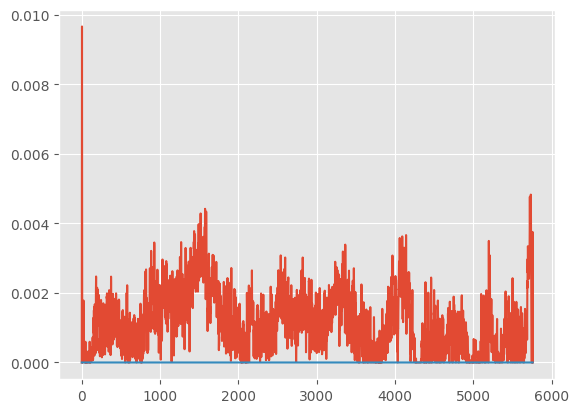

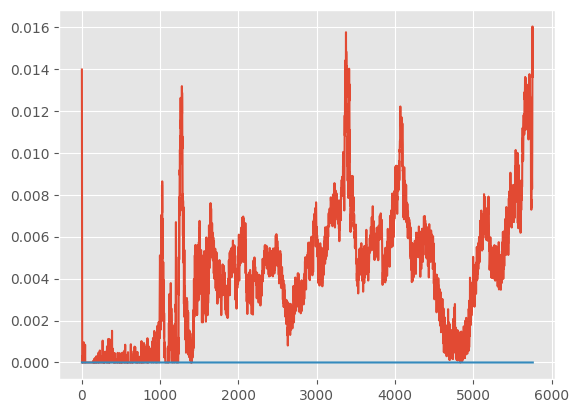

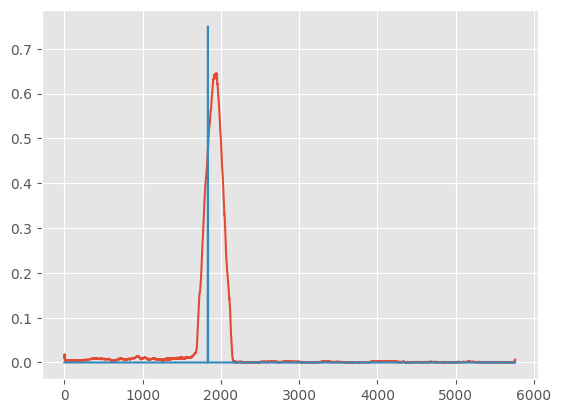

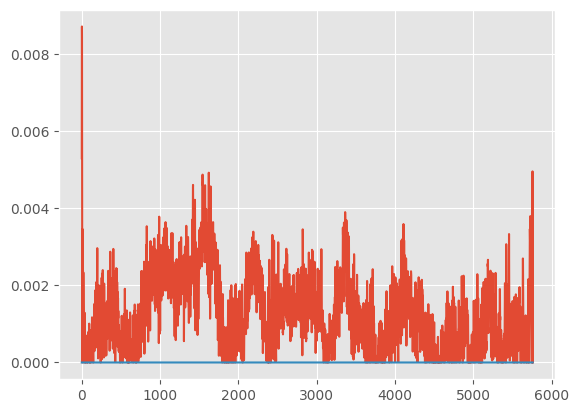

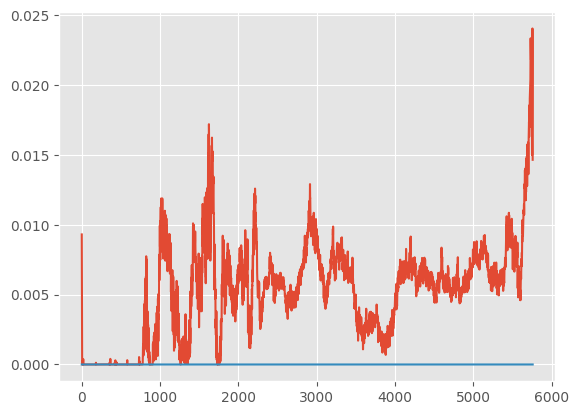

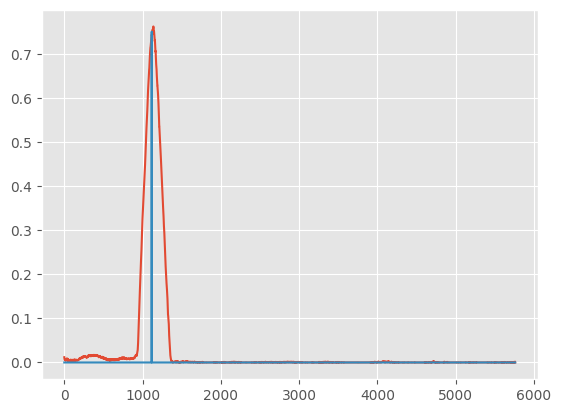

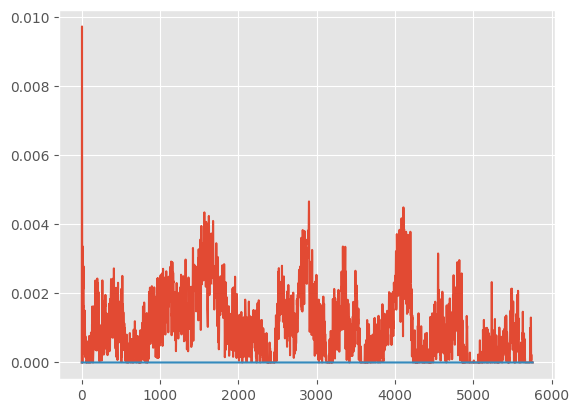

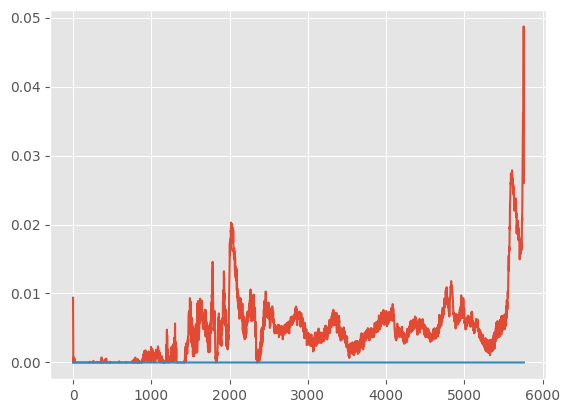

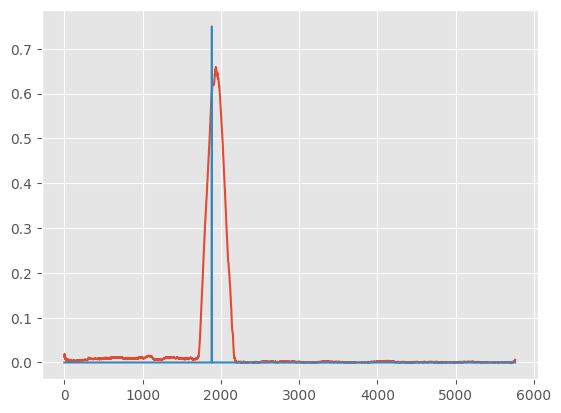

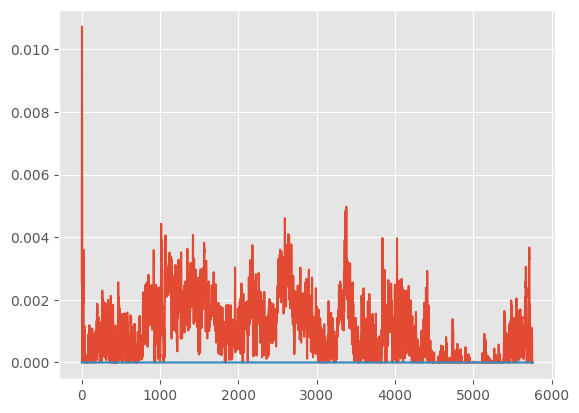

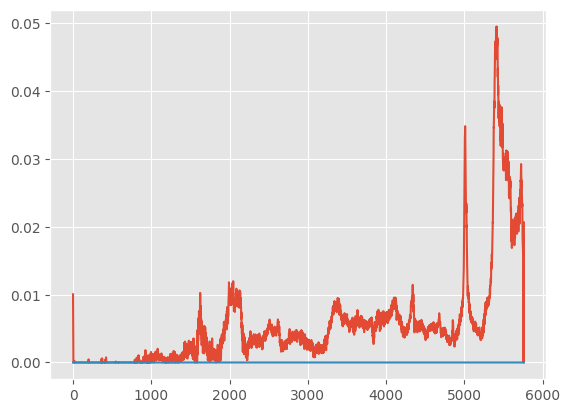

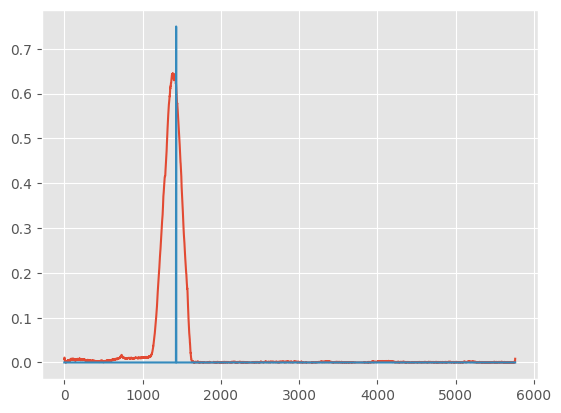

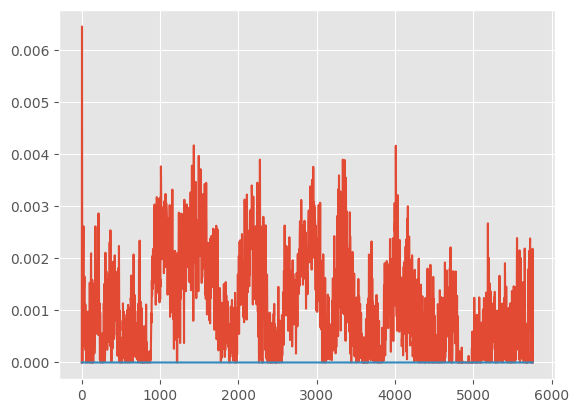

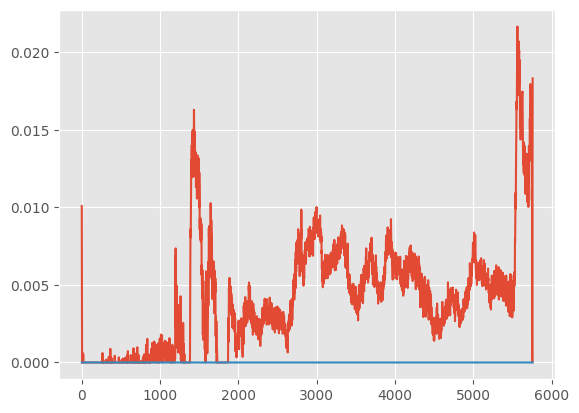

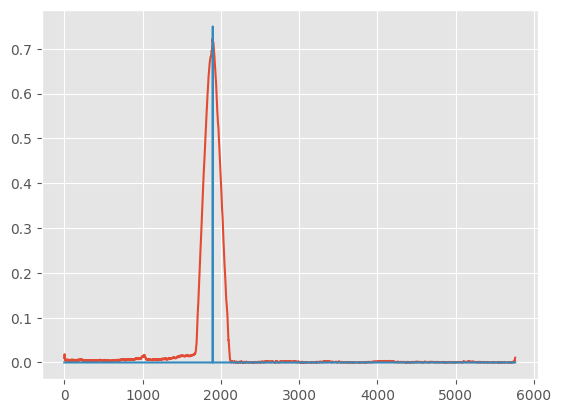

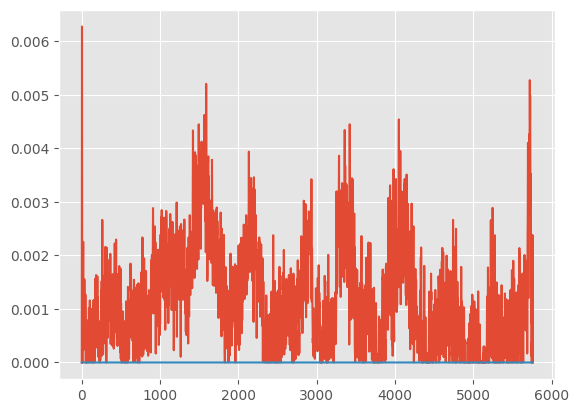

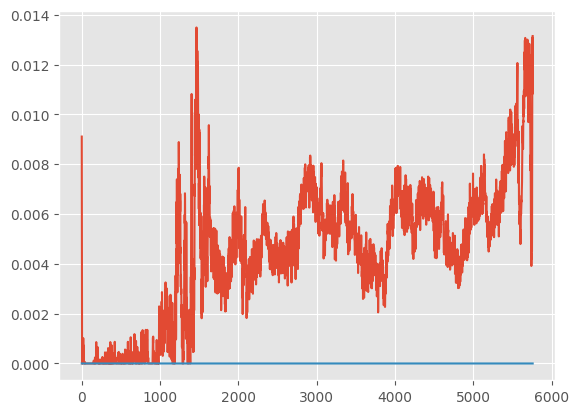

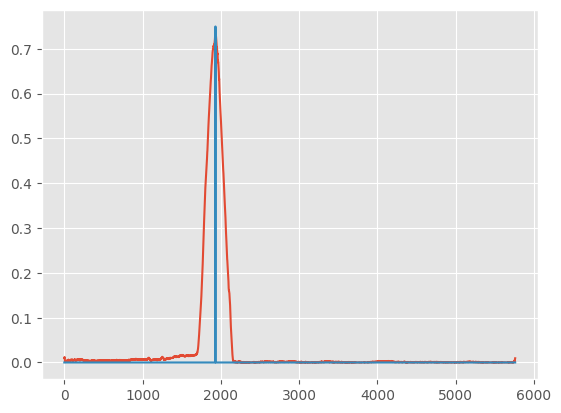

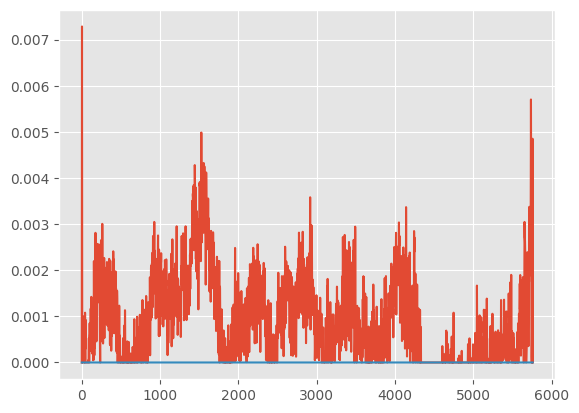

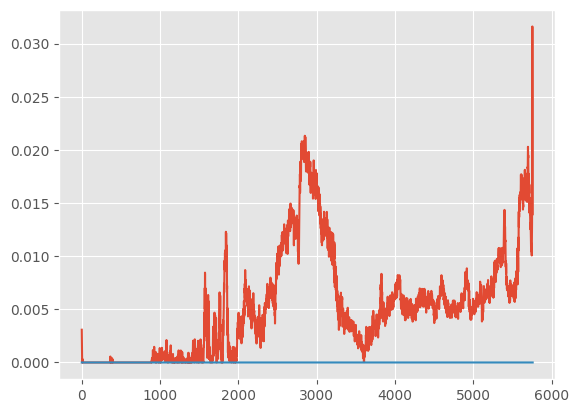

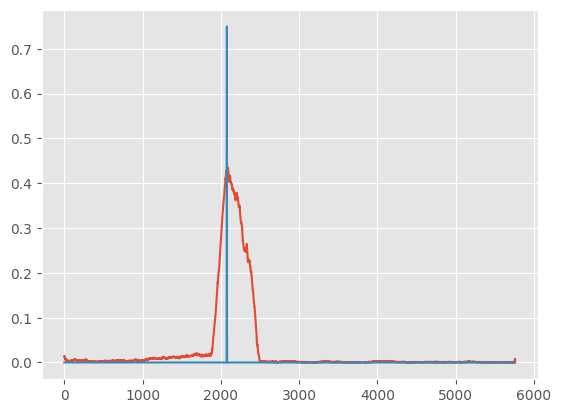

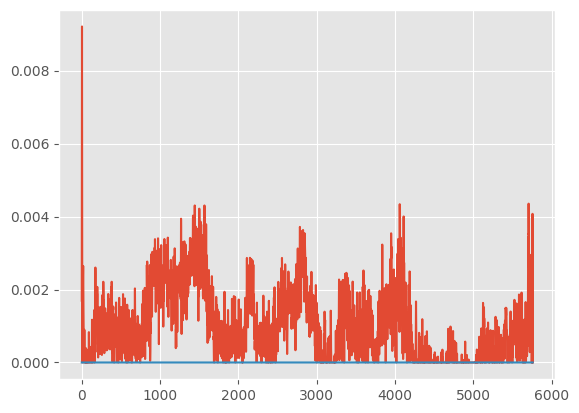

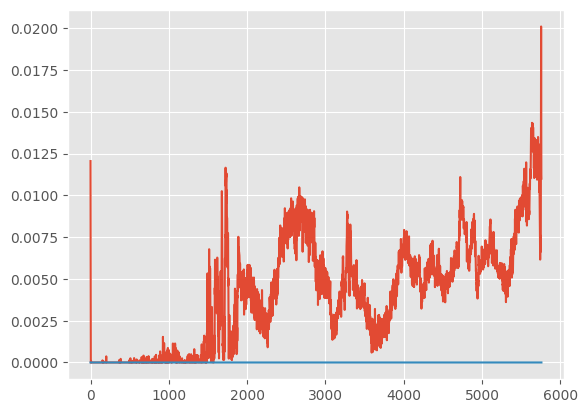

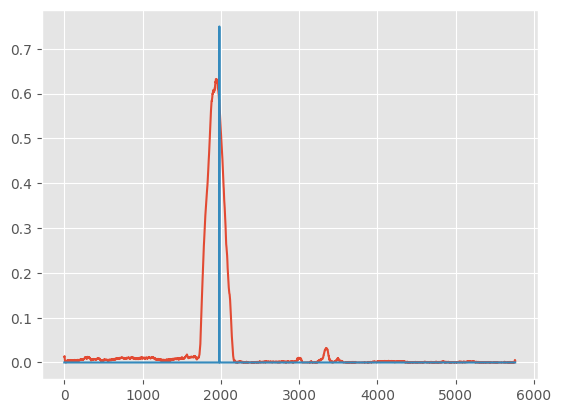

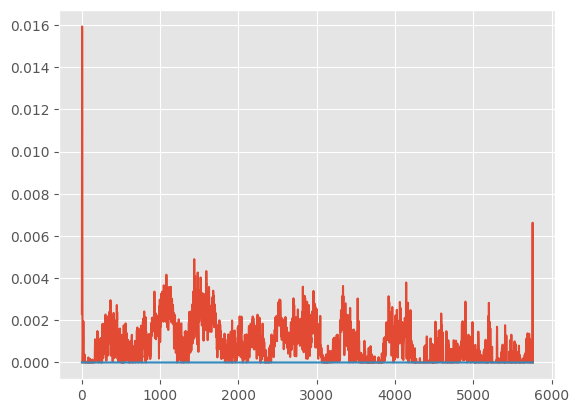

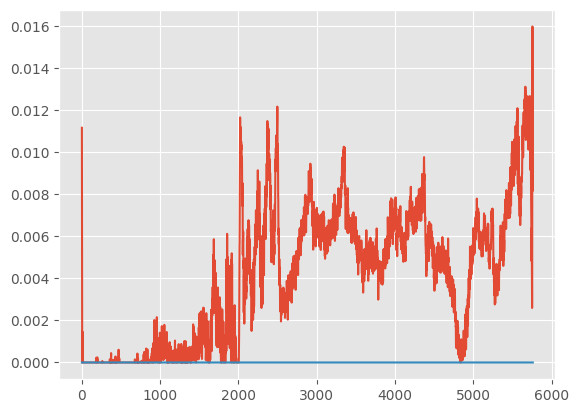

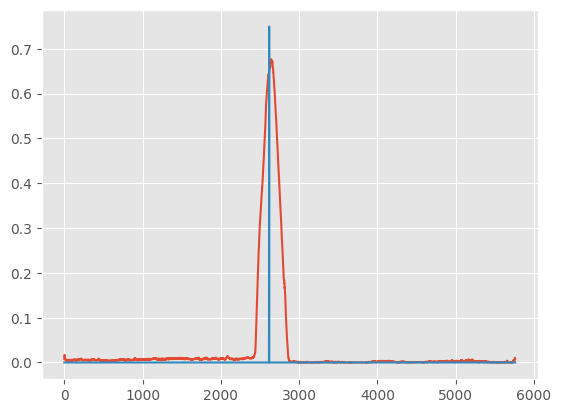

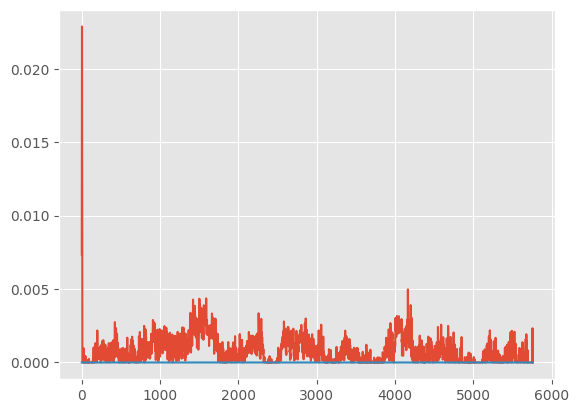

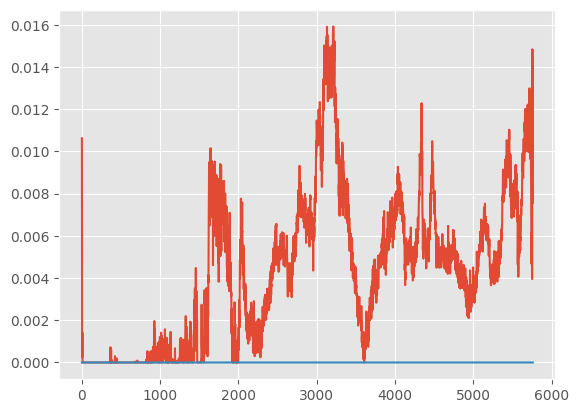

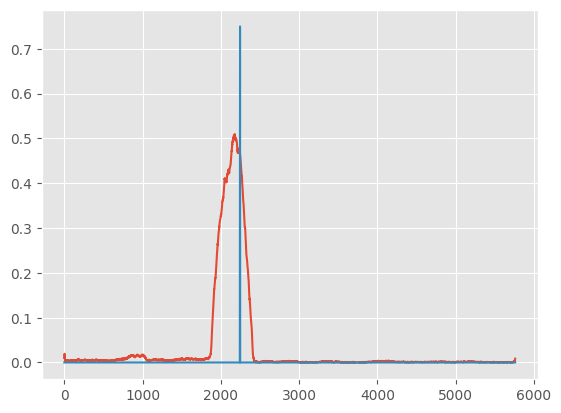

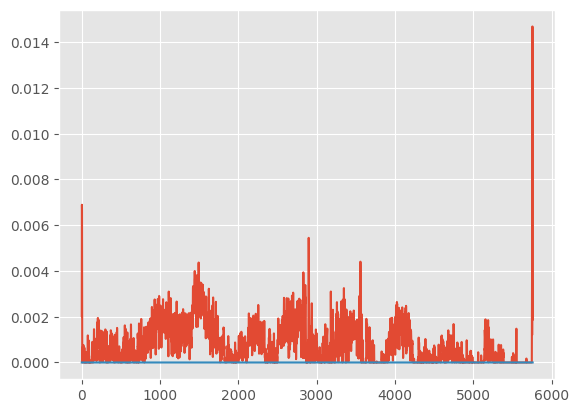

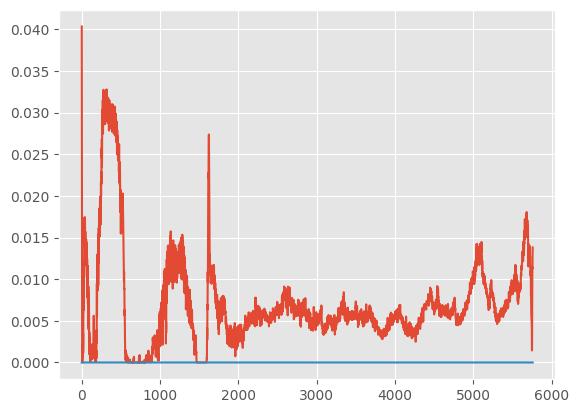

In [92]:
for idx in range(150,250):
    plt.plot(preds[idx,:,2])
    plt.plot(labels[idx,:,2])
    plt.show()


In [84]:
def objective(trial: optuna.Trial):
    #score_th = 0.005
    score_th = trial.suggest_float("th", 0.0005, 0.01)
    distance = trial.suggest_int("distance", 1, 200)

    pred_df: pl.DataFrame = post_process_for_seg(
        keys, preds[:, :, [1, 2]], score_th=score_th, distance=distance
    )
    score = event_detection_ap(gt_df, pred_df.to_pandas())

    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-11-21 10:00:04,851] A new study created in memory with name: no-name-63ca3b97-ad4a-4d63-a1cb-63a1196a3e86
[I 2023-11-21 10:00:42,311] Trial 0 finished with value: 0.3216904943470551 and parameters: {'th': 0.009745122542098361, 'distance': 29}. Best is trial 0 with value: 0.3216904943470551.
[I 2023-11-21 10:01:07,339] Trial 1 finished with value: 0.6167905073311202 and parameters: {'th': 0.0020213493467793804, 'distance': 173}. Best is trial 1 with value: 0.6167905073311202.
[I 2023-11-21 10:01:36,796] Trial 2 finished with value: 0.4741540974070344 and parameters: {'th': 0.005957855143342003, 'distance': 53}. Best is trial 1 with value: 0.6167905073311202.
[I 2023-11-21 10:01:59,785] Trial 3 finished with value: 0.46598351401813765 and parameters: {'th': 0.0073439908533040315, 'distance': 52}. Best is trial 1 with value: 0.6167905073311202.
[I 2023-11-21 10:02:29,358] Trial 4 finished with value: 0.6024430857947842 and parameters: {'th': 0.0023131773578434524, 'distance': 101}

UnboundLocalError: local variable 'frozen_trial' referenced before assignment

In [93]:
def plot_random_sample(keys, preds, labels, num_samples=5, num_chunks=10):
    # get series ids
    series_ids = np.array(list(map(lambda x: x.split("_")[0], keys)))
    unique_series_ids = np.unique(series_ids)

    # get random series
    random_series_ids = np.random.choice(unique_series_ids, num_samples)

    for i, random_series_id in enumerate(random_series_ids):
        # get random series
        series_idx = np.where(series_ids == random_series_id)[0]
        this_series_preds = preds[series_idx].reshape(-1, 3)
        this_series_labels = labels[series_idx].reshape(-1, 3)

        # split series
        this_series_preds = np.split(this_series_preds, num_chunks)
        this_series_labels = np.split(this_series_labels, num_chunks)

        fig, axs = plt.subplots(num_chunks, 1, figsize=(20, 5 * num_chunks))
        if num_chunks == 1:
            axs = [axs]
        for j in range(num_chunks):
            this_series_preds_chunk = this_series_preds[j]
            this_series_labels_chunk = this_series_labels[j]

            # get onset and wakeup idx
            onset_idx = np.nonzero(this_series_labels_chunk[:, 1])[0]
            wakeup_idx = np.nonzero(this_series_labels_chunk[:, 2])[0]

            axs[j].plot(this_series_preds_chunk[:, 0], label="pred_sleep")
            axs[j].plot(this_series_preds_chunk[:, 1], label="pred_onset")
            axs[j].plot(this_series_preds_chunk[:, 2], label="pred_wakeup")
            # axs[j].vlines(onset_idx, 0, 1, label="onset", linestyles="dashed", color="C1")
            # axs[j].vlines(wakeup_idx, 0, 1, label="wakeup", linestyles="dashed", color="C2")
            axs[j].set_ylim(0, 1)
            axs[j].set_title(f"series_id: {random_series_id} chunk_id: {j}")
            axs[j].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

    plt.tight_layout()

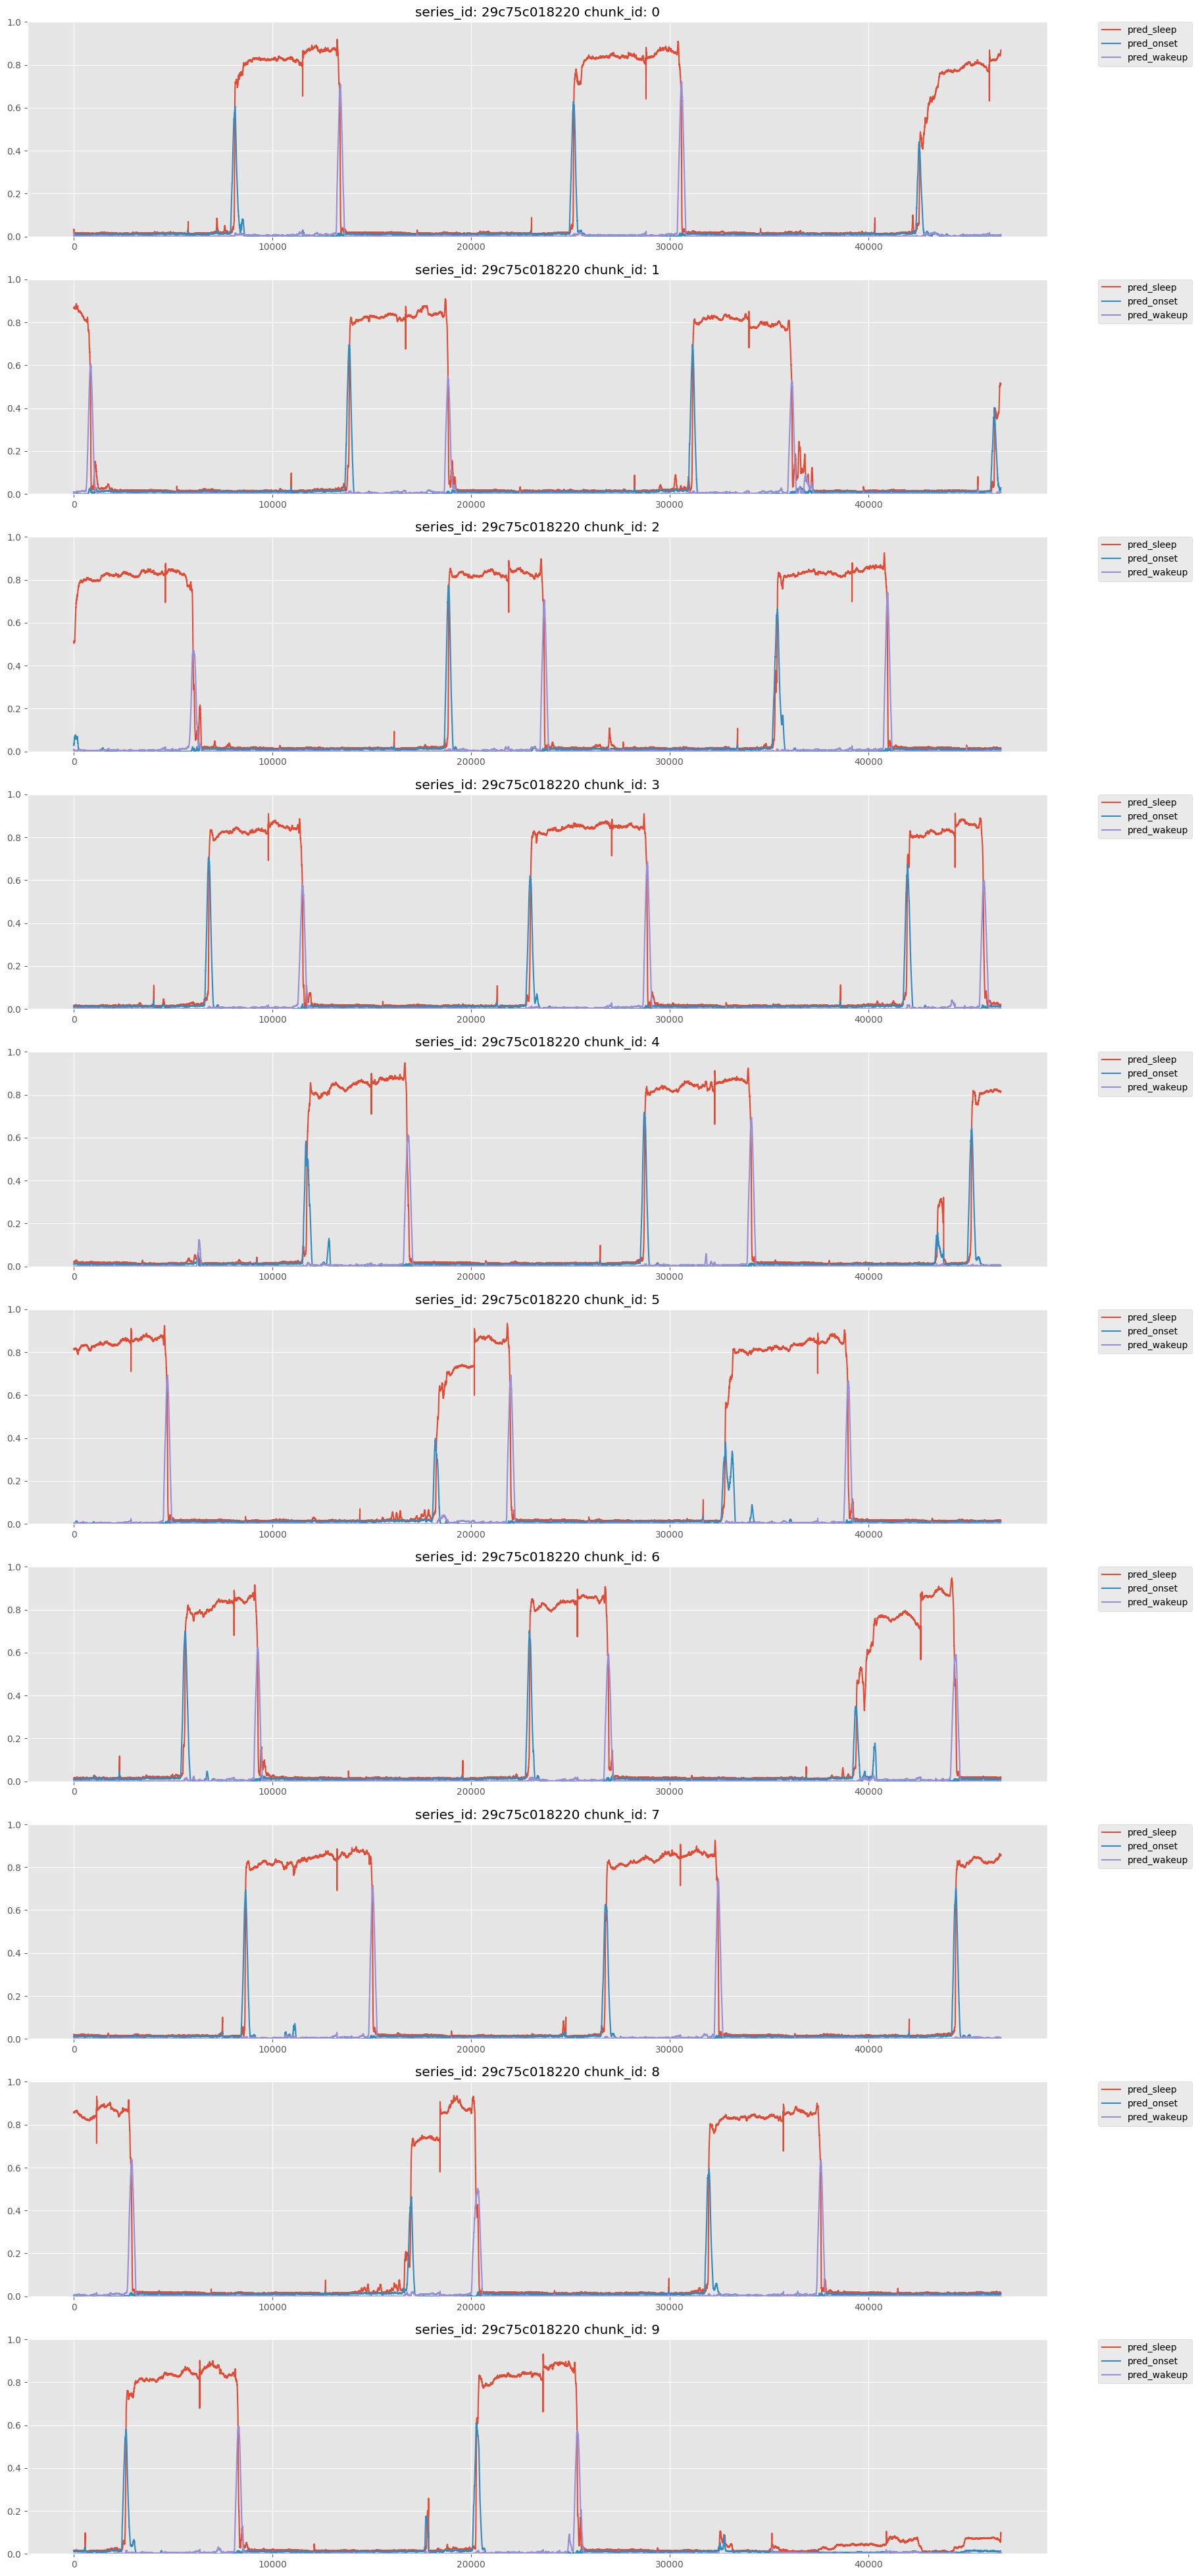

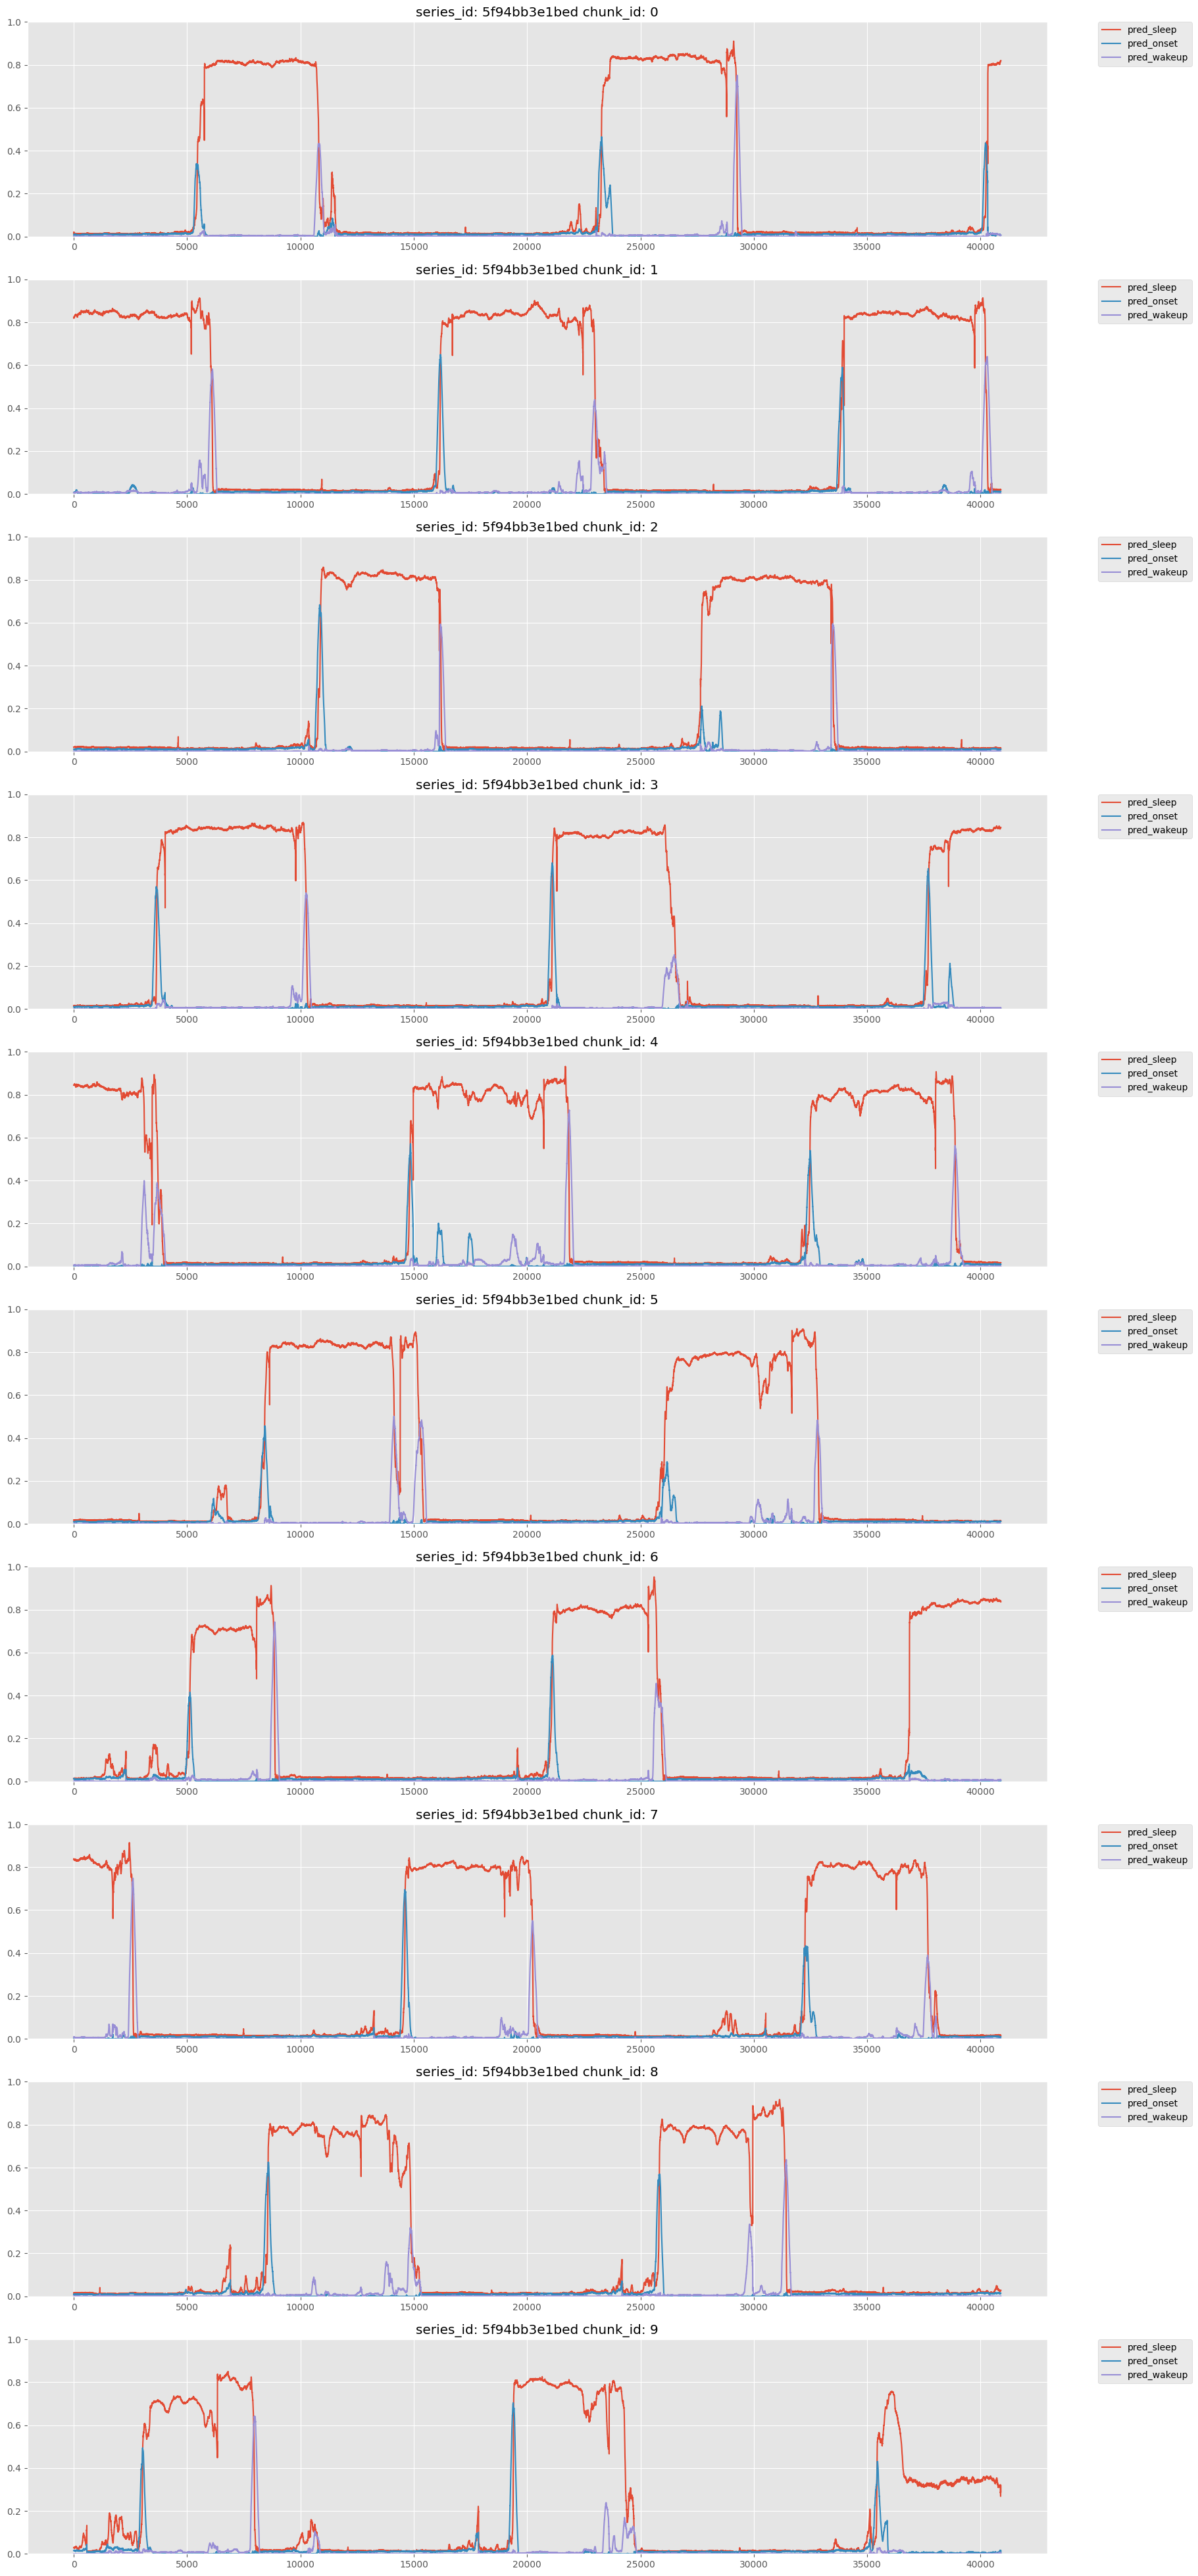

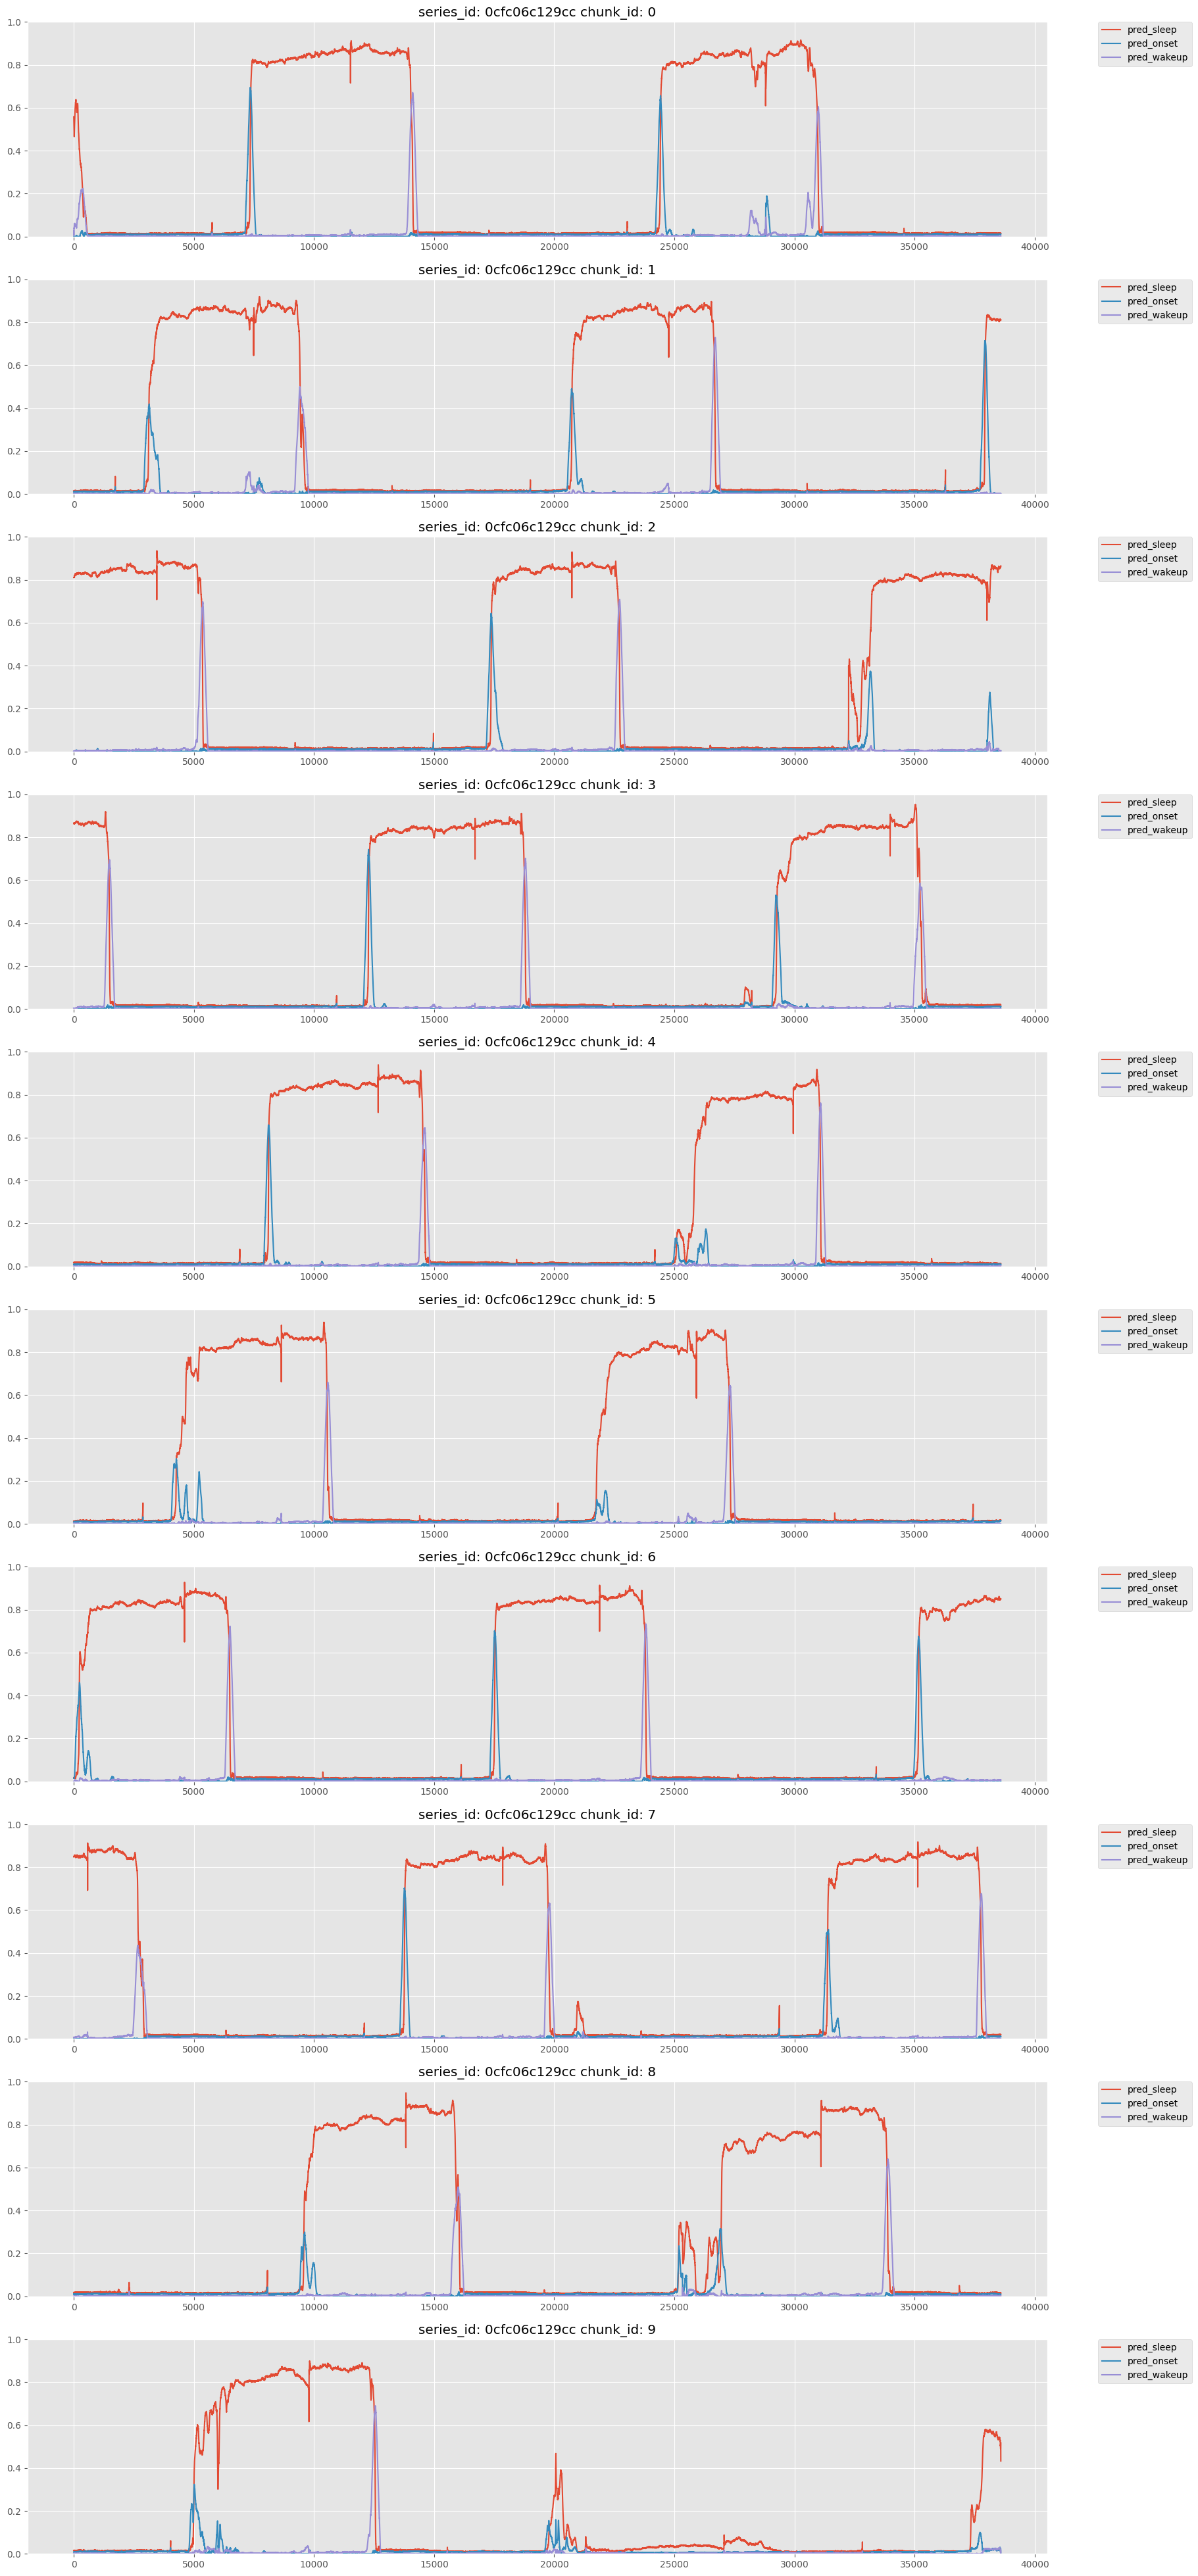

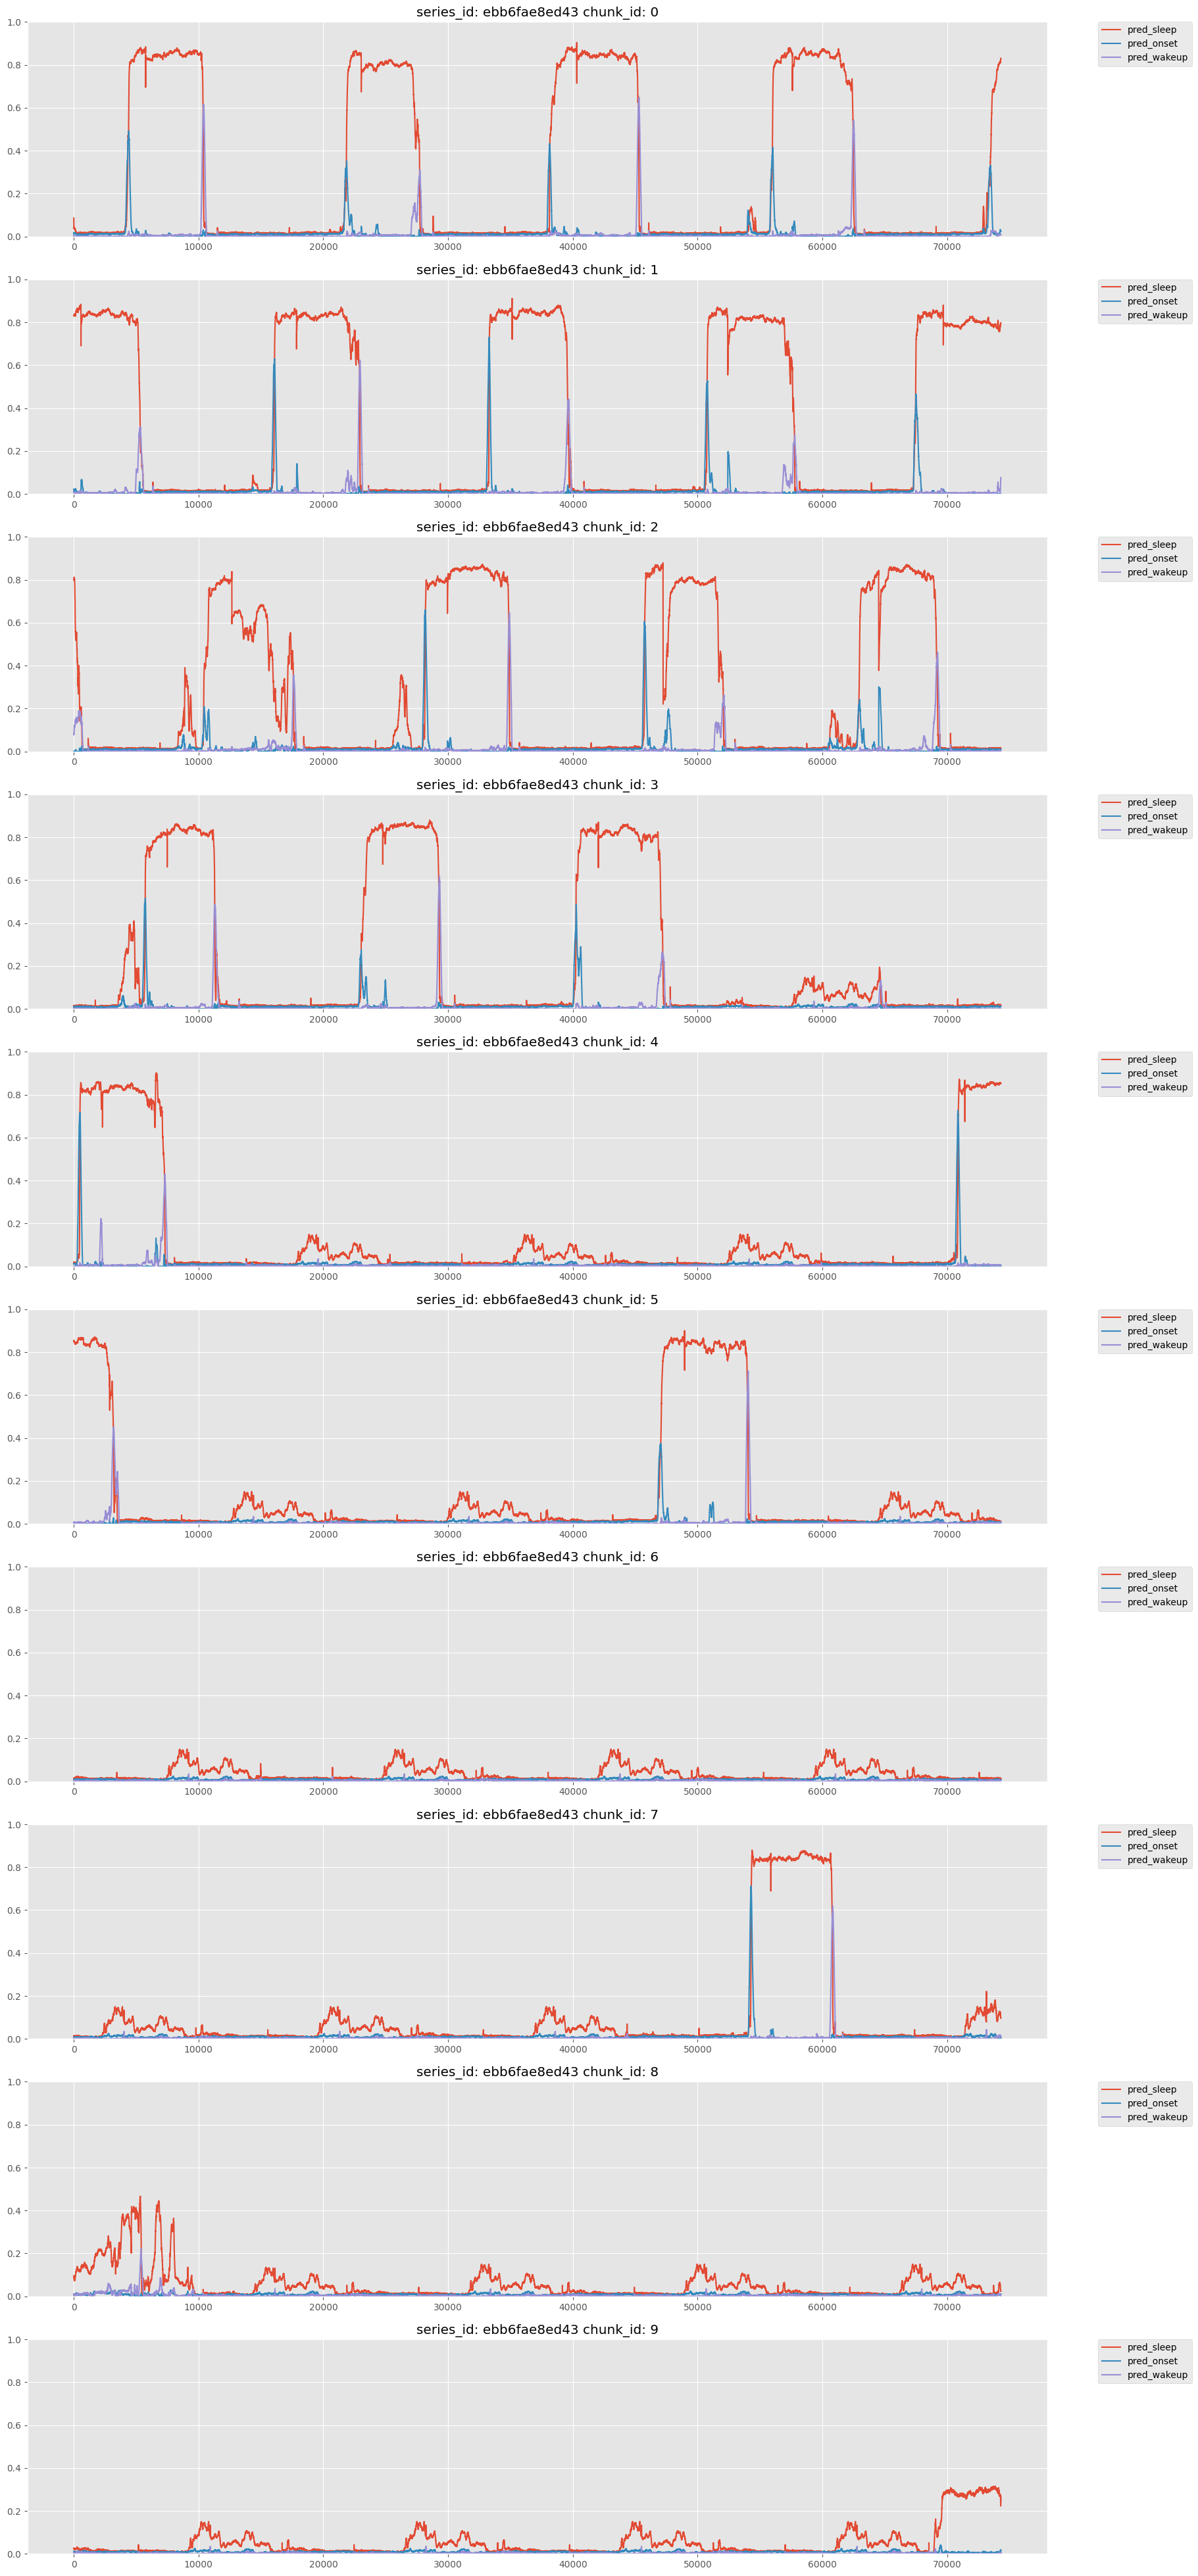

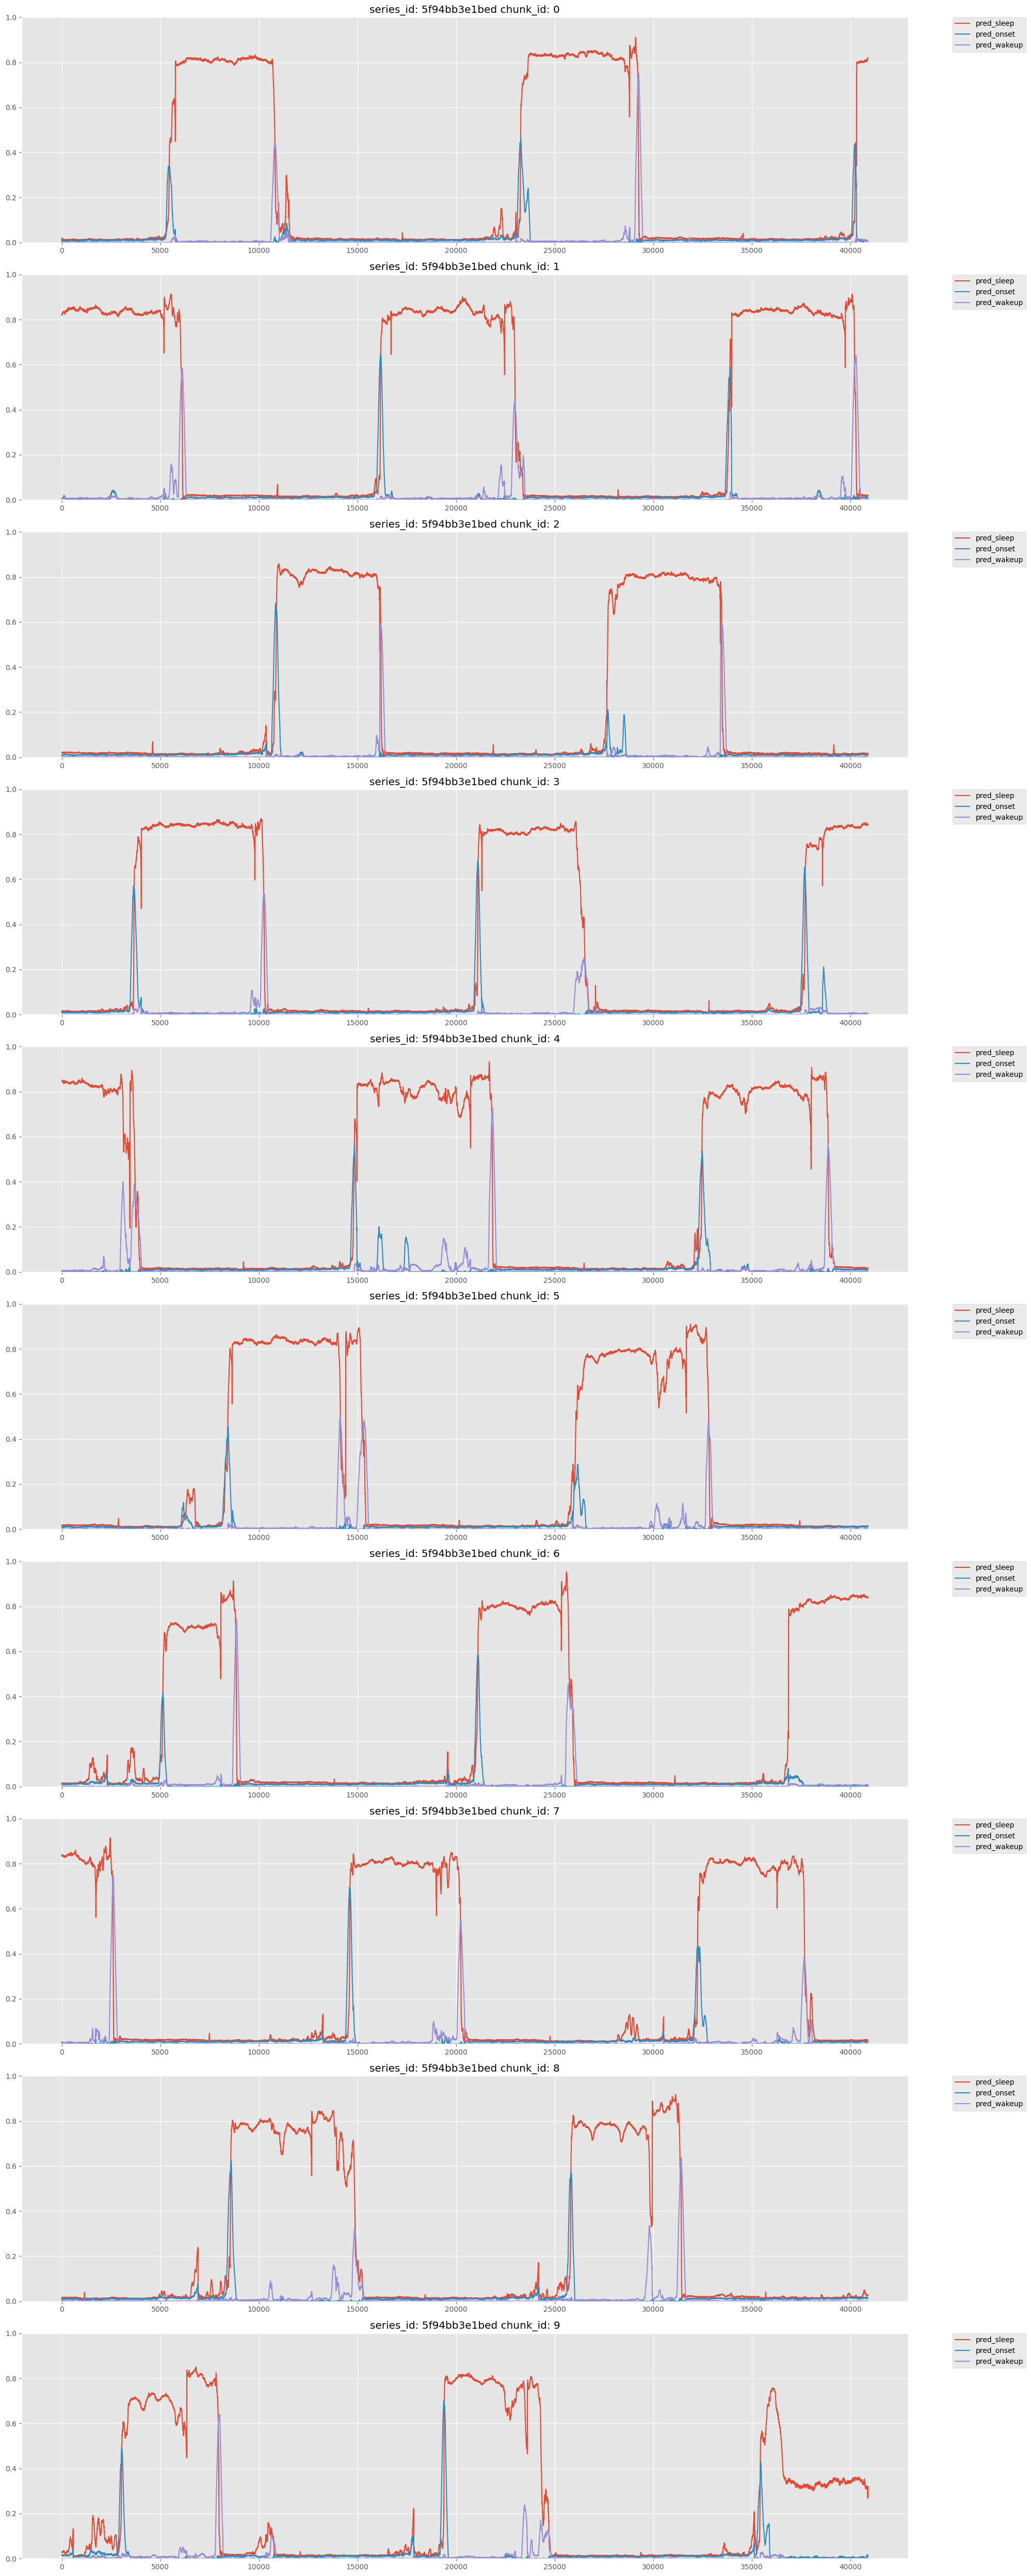

In [94]:
plot_random_sample(keys, preds, labels, num_chunks=10)